In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

path = '..'

# import os
# os.chdir(path)

In [3]:
df = pd.read_csv(f'{path}/dataset/GetSBProfileInfoService/getOtlInfo/all.csv')

In [ ]:
tmp = pd.read_csv(f'{path}/dataset/GetSBProfileInfoService/getCsdoStatus/all.csv')

In [10]:
key=list(df.columns)

In [11]:
df = pd.merge(df, tmp, on=key, how = 'left')

In [34]:
tmp = df.groupby(['basYm', 'rprSexNm', 'rprAggrNm', 'estbYr', 'bizAreaNm', 'bizBzcCd', 'empeCntNm']).count().reset_index() # 이걸론 unique 불가능 -> 분석은 가능할 듯???

In [3]:
# 년도별 설립 확인 가능할 듯?????? -> 재무상태는 나중에 확인하고 일단 업종...
df[(df['rprSexNm']=='남성') & (df['rprAggrNm']=='30대') & (df['estbYr']==1972) & (df['bizAreaNm']=='서울특별시 서대문구')] # 3명 존재... 개인으로는 확인 불가능 같은년도에 3명....

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm
791357,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만
1781357,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만
2781357,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만
3898400,202208,남성,30대,1972,서울특별시 서대문구,47,소매업; 자동차 제외,1명 이상 5명 미만


In [ ]:
tmp['bizBzcCdNm'].unique() # unique가 안됨... 합칠 수 없음

array([  4,   2,   8,   3,  12,  20,   6,  16,  32,  28,  24,  40,  36,
         9,  15,   5,  48,  44,  10,  64,  52, 104,  68,  60,  56,  84,
        76,  92,  21,  14,  22,  18,  72, 108,  80, 124,  88, 100, 116,
        17,  96, 152,  30, 204, 112, 156, 136, 128, 120,  34,  11, 132,
        23,  27,  33,  26,  38,   7,  31,  39,  13,  25])

In [43]:
# 같은 동네에 같은 규모의 동일 업종이 많은듯? -> 사장 나이도 비슷....;
df['bizBzcCd'].unique()

array([47, 46, 10, 42, 56, 96, 45, 49, 86, 71, 73, 41, 95, 85, 94, 29, 76,
       55, 68, 91, 30, 20, 72, 25, 33, 16, 32, 23, 90, 35, 26, 52, 14, 59,
       58, 13, 75, 18, 28, 17, 22, 27, 15, 63, 62, 74, 24, 38, 87, 34, 31,
       37,  1, 12,  3, 50])

In [4]:
tmp = df.groupby(['basYm', 'bizAreaNm', 'bizBzcCd']).count().reset_index()

In [5]:
tmp=tmp.iloc[:, :4]

In [6]:
tmp.columns = tmp.columns[:-1].tolist() + ['count']

In [7]:
tmp

,basYm,bizAreaNm,bizBzcCd,count
0,202208,강원도 강릉시,10,236
1,202208,강원도 강릉시,41,44
2,202208,강원도 강릉시,42,380
3,202208,강원도 강릉시,45,596
4,202208,강원도 강릉시,46,884
...,...,...,...,...
16378,202406,충청북도 충주시 앙성면,56,92
16379,202406,충청북도 충주시 앙성면,76,24
16380,202406,충청북도 충주시 앙성면,85,12
16381,202406,충청북도 충주시 앙성면,86,18


In [8]:
kind_changes = tmp.pivot_table(index=['bizAreaNm', 'bizBzcCd'], columns='basYm', values='count').reset_index()

In [ ]:
# 지역별로 업종 변화 확인 가능.... 근데 다 없어진게 말이 되나...;

In [ ]:
# df[['bizBzcCd', 'bizBzcCdNm']].drop_duplicates().sort_values(by='bizBzcCd').to_csv(f'{path}/dataset/업종분류.csv', index=False)

In [9]:
kind = pd.read_csv(f'{path}/dataset/업종분류.csv')

In [10]:
kind_changes = kind_changes.merge(kind, on='bizBzcCd')

In [11]:
kind_changes
# 3개년 데이터 다 있는 데이터들 확인 필요

,bizAreaNm,bizBzcCd,202208,202306,202406,bizBzcCdNm
0,강원도 강릉시,10,236.0,NaN,NaN,식료품 제조업
1,강원도 강릉시,41,44.0,NaN,NaN,종합 건설업
2,강원도 강릉시,42,380.0,NaN,NaN,전문직별 공사업
3,강원도 강릉시,45,596.0,NaN,NaN,자동차 및 부품 판매업
4,강원도 강릉시,46,884.0,NaN,NaN,도매 및 상품 중개업
...,...,...,...,...,...,...
10167,충청북도 충주시 앙성면,56,NaN,126.0,92.0,음식점 및 주점업
10168,충청북도 충주시 앙성면,76,NaN,26.0,24.0,임대업; 부동산 제외
10169,충청북도 충주시 앙성면,85,NaN,26.0,12.0,교육 서비스업
10170,충청북도 충주시 앙성면,86,NaN,28.0,18.0,보건업


In [12]:
kind_changes['bizAreaNm'].unique()

array(['강원도 강릉시', '강원도 고성군', '강원도 동해시', '강원도 삼척시', '강원도 속초시', '강원도 양양군',
       '강원도 영월군', '강원도 원주시', '강원도 인제군', '강원도 정선군', '강원도 철원군', '강원도 춘천시',
       '강원도 태백시', '강원도 평창군', '강원도 홍천군', '강원도 화천군', '강원도 횡성군',
       '강원특별자치도 강릉시 강변로', '강원특별자치도 강릉시 교동광장로', '강원특별자치도 강릉시 연곡면',
       '강원특별자치도 고성군 현내면', '강원특별자치도 동해시 동해대로', '강원특별자치도 동해시 지양길',
       '강원특별자치도 삼척시 하장면', '강원특별자치도 속초시 농공단지길', '강원특별자치도 속초시 울산바위길',
       '강원특별자치도 양구군 방산면', '강원특별자치도 양양군 강현면', '강원특별자치도 영월군 무릉도원면',
       '강원특별자치도 원주시 귀론길', '강원특별자치도 원주시 호저면', '강원특별자치도 인제군 서화면',
       '강원특별자치도 정선군 북평면', '강원특별자치도 철원군 철원읍', '강원특별자치도 춘천시 동내면',
       '강원특별자치도 춘천시 보안길', '강원특별자치도 춘천시 사북면', '강원특별자치도 태백시 가리골길',
       '강원특별자치도 평창군 봉평면', '강원특별자치도 홍천군 서면', '강원특별자치도 화천군 상서면',
       '강원특별자치도 횡성군 서원면', '경기도 가평군', '경기도 가평군 북면', '경기도 고양시',
       '경기도 고양시 덕양구', '경기도 고양시 일산동구', '경기도 고양시 일산서구', '경기도 과천시',
       '경기도 과천시 관악산길', '경기도 광명시', '경기도 광명시 광명로', '경기도 광주시',
       '경기도 광주시 곤지암읍', '경기도 광주시 남한산성면', '경기도 구리시', '경기도 구리시 갈매순환로',
       '경기도 군포시'

In [ ]:
# 지역별로 나눠서 분석 필요 도별로 나누기

In [ ]:
kind_changes[kind_changes['bizAreaNm'] == '강원도 강릉시'] # 강릉시는 2023이후로 값이 없음... -> 다른곳도 그런 곳 있는지 확인 필요

,bizAreaNm,bizBzcCd,202208,202306,202406,bizBzcCdNm
0,강원도 강릉시,10,236.0,NaN,NaN,식료품 제조업
1,강원도 강릉시,41,44.0,NaN,NaN,종합 건설업
2,강원도 강릉시,42,380.0,NaN,NaN,전문직별 공사업
3,강원도 강릉시,45,596.0,NaN,NaN,자동차 및 부품 판매업
4,강원도 강릉시,46,884.0,NaN,NaN,도매 및 상품 중개업
5,강원도 강릉시,47,944.0,NaN,NaN,소매업; 자동차 제외
6,강원도 강릉시,49,368.0,NaN,NaN,육상 운송 및 파이프라인 운송업
7,강원도 강릉시,56,1048.0,NaN,NaN,음식점 및 주점업
8,강원도 강릉시,71,20.0,NaN,NaN,전문 서비스업
9,강원도 강릉시,73,28.0,NaN,NaN,기타 전문 과학 및 기술 서비스업


In [ ]:
# 정보가 없는건지 폐업한건지 확인 필요...

In [ ]:
kind_changes[kind_changes[202406].isna()][['bizAreaNm', 'bizBzcCd', 'bizBzcCdNm']].drop_duplicates()  # 분석 불가??

,bizAreaNm,bizBzcCd,bizBzcCdNm
0,강원도 강릉시,10,식료품 제조업
1,강원도 강릉시,41,종합 건설업
2,강원도 강릉시,42,전문직별 공사업
3,강원도 강릉시,45,자동차 및 부품 판매업
4,강원도 강릉시,46,도매 및 상품 중개업
...,...,...,...
10144,충청북도 충주시,91,스포츠 및 오락관련 서비스업
10145,충청북도 충주시,95,개인 및 소비용품 수리업
10146,충청북도 충주시,96,기타 개인 서비스업
10150,충청북도 충주시 거룡2길,26,전자 부품 컴퓨터 영상 음향 및 통신장비 제조업


In [ ]:
df['지역'] = df['bizAreaNm'].apply(lambda x: x.split(' ') if len(x.split(' '))>2 else list(x.split(' '))+[None])
df['지역_도'] = df['지역'].apply(lambda x: x[0])
df['지역_시'] = df['지역'].apply(lambda x: x[1])
df['지역_세부'] = df['지역'].apply(lambda x: x[2] if len(x)>2 else None)

In [8]:
df # 도별로 우세업종 확인

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,지역,지역_도,지역_시,지역_세부
0,202208,남성,60대,2003,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, None]",강원도,강릉시,None
1,202208,남성,60대,1999,강원도 강릉시,47,소매업; 자동차 제외,0명,"[강원도, 강릉시, None]",강원도,강릉시,None
2,202208,여성,40대,2018,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, None]",강원도,강릉시,None
3,202208,남성,50대,2017,강원도 강릉시,47,소매업; 자동차 제외,0명,"[강원도, 강릉시, None]",강원도,강릉시,None
4,202208,여성,40대,2000,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, None]",강원도,강릉시,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4224081,202406,남성,50대,2017,충청북도 충주시 앙성면,49,육상 운송 및 파이프라인 운송업,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면
4224082,202406,여성,50대,2019,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면
4224083,202406,남성,30대,2021,충청북도 충주시 앙성면,47,소매업; 자동차 제외,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면
4224084,202306,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면


In [9]:
df.loc[df['지역_도'] == '세종특별자치시', '지역_시'] ='세종특별자치시'

In [10]:
df[df['지역_도']=='세종특별자치시']

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,지역,지역_도,지역_시,지역_세부
891716,202208,여성,30대,2016,세종특별자치시,96,기타 개인 서비스업,0명,"[세종특별자치시, None]",세종특별자치시,세종특별자치시,None
891717,202208,남성,50대,1998,세종특별자치시,42,전문직별 공사업,0명,"[세종특별자치시, None]",세종특별자치시,세종특별자치시,None
891718,202208,여성,40대,2018,세종특별자치시,96,기타 개인 서비스업,0명,"[세종특별자치시, None]",세종특별자치시,세종특별자치시,None
891719,202208,남성,40대,2019,세종특별자치시,45,자동차 및 부품 판매업,0명,"[세종특별자치시, None]",세종특별자치시,세종특별자치시,None
891720,202208,남성,40대,2013,세종특별자치시,49,육상 운송 및 파이프라인 운송업,0명,"[세종특별자치시, None]",세종특별자치시,세종특별자치시,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4002636,202306,여성,60대,2019,세종특별자치시 소정면,45,자동차 및 부품 판매업,1명 이상 5명 미만,"[세종특별자치시, , 소정면]",세종특별자치시,세종특별자치시,소정면
4002637,202306,남성,40대,2018,세종특별자치시 소정면,95,개인 및 소비용품 수리업,1명 이상 5명 미만,"[세종특별자치시, , 소정면]",세종특별자치시,세종특별자치시,소정면
4002638,202406,남성,50대,2011,세종특별자치시 소정면,46,도매 및 상품 중개업,0명,"[세종특별자치시, , 소정면]",세종특별자치시,세종특별자치시,소정면
4002639,202406,남성,60대,2000,세종특별자치시 소정면,46,도매 및 상품 중개업,1명 이상 5명 미만,"[세종특별자치시, , 소정면]",세종특별자치시,세종특별자치시,소정면


In [53]:
df['지역_도'].unique()

array(['강원도', '강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [11]:
df.loc[df['지역_도'] == '강원도', '지역_도'] = '강원특별자치도'

In [65]:
df.to_csv('../dataset/전체.csv', index=False)

In [3]:
df = pd.read_csv('../dataset/전체_지역컬럼구분.csv')

In [13]:
df['year'] = df['basYm'] // 100

In [11]:
df['지역_도'].unique()

array(['강원도', '강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [14]:
df[df['지역_세부'].isna()]['year'].unique()

array([2022])

In [ ]:
# 세종특별자치시...

In [17]:
df[df['지역_도'] == '제주특별자치도']

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,지역,지역_도,지역_시,지역_세부,year
3034677,202208,남성,50대,2019,제주특별자치도 서귀포시,47,소매업; 자동차 제외,1명 이상 5명 미만,"['제주특별자치도', '서귀포시', ' ']",제주특별자치도,서귀포시,,2022
3034678,202208,남성,60대,2015,제주특별자치도 서귀포시,56,음식점 및 주점업,1명 이상 5명 미만,"['제주특별자치도', '서귀포시', ' ']",제주특별자치도,서귀포시,,2022
3034679,202208,여성,30대,2019,제주특별자치도 서귀포시,68,부동산업,1명 이상 5명 미만,"['제주특별자치도', '서귀포시', ' ']",제주특별자치도,서귀포시,,2022
3034680,202208,남성,40대,2020,제주특별자치도 서귀포시,47,소매업; 자동차 제외,1명 이상 5명 미만,"['제주특별자치도', '서귀포시', ' ']",제주특별자치도,서귀포시,,2022
3034681,202208,남성,50대,2018,제주특별자치도 서귀포시,56,음식점 및 주점업,1명 이상 5명 미만,"['제주특별자치도', '서귀포시', ' ']",제주특별자치도,서귀포시,,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163459,202406,남성,50대,2011,제주특별자치도 제주시 추자면,32,가구 제조업,1명 이상 5명 미만,"['제주특별자치도', '제주시', '추자면']",제주특별자치도,제주시,추자면,2024
4163460,202406,남성,40대,2007,제주특별자치도 제주시 추자면,55,숙박업,0명,"['제주특별자치도', '제주시', '추자면']",제주특별자치도,제주시,추자면,2024
4163461,202406,남성,50대,2011,제주특별자치도 제주시 추자면,46,도매 및 상품 중개업,0명,"['제주특별자치도', '제주시', '추자면']",제주특별자치도,제주시,추자면,2024
4163462,202406,남성,40대,2012,제주특별자치도 제주시 추자면,46,도매 및 상품 중개업,1명 이상 5명 미만,"['제주특별자치도', '제주시', '추자면']",제주특별자치도,제주시,추자면,2024


In [16]:
df_2023 = df[df['year'] == 2023]

In [19]:
df_2023.drop('basYm', inplace=True, axis=1)

In [20]:
df_2023

,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,지역,지역_도,지역_시,지역_세부,year
7324,여성,50대,2019,강원특별자치도 강릉시 강변로,56,음식점 및 주점업,1명 이상 5명 미만,"[강원특별자치도, 강릉시, 강변로]",강원특별자치도,강릉시,강변로,2023
7335,여성,50대,2014,강원특별자치도 강릉시 강변로,56,음식점 및 주점업,0명,"[강원특별자치도, 강릉시, 강변로]",강원특별자치도,강릉시,강변로,2023
7336,여성,50대,2016,강원특별자치도 강릉시 강변로,56,음식점 및 주점업,0명,"[강원특별자치도, 강릉시, 강변로]",강원특별자치도,강릉시,강변로,2023
7337,여성,50대,2019,강원특별자치도 강릉시 강변로,56,음식점 및 주점업,1명 이상 5명 미만,"[강원특별자치도, 강릉시, 강변로]",강원특별자치도,강릉시,강변로,2023
7338,여성,50대,2010,강원특별자치도 강릉시 강변로,56,음식점 및 주점업,0명,"[강원특별자치도, 강릉시, 강변로]",강원특별자치도,강릉시,강변로,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
4224078,남성,60대,2011,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2023
4224079,남성,60대,1995,충청북도 충주시 앙성면,46,도매 및 상품 중개업,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2023
4224080,남성,60대,1991,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2023
4224084,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2023


In [12]:
df_dg = df[df['지역_도']=='대구광역시']

In [74]:
# 고용인에 따른 사업장 규모 정의 필요(법령확인?)
# 지역별 사업자 연령파악??????? 의미가..????????????????
df_dg.to_csv(f"{path}/dataset/대구_raw.csv", index=False)

In [13]:
cols = list(df_dg.columns)

In [27]:
# tmp = df_dg[cols[:4] + cols[5:8] + ['지역_시']]
# tmp['count'] = 1

In [28]:
df

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,지역,지역_도,지역_시,지역_세부,year
0,202208,남성,60대,2003,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, None]",강원특별자치도,강릉시,None,2022
1,202208,남성,60대,1999,강원도 강릉시,47,소매업; 자동차 제외,0명,"[강원도, 강릉시, None]",강원특별자치도,강릉시,None,2022
2,202208,여성,40대,2018,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, None]",강원특별자치도,강릉시,None,2022
3,202208,남성,50대,2017,강원도 강릉시,47,소매업; 자동차 제외,0명,"[강원도, 강릉시, None]",강원특별자치도,강릉시,None,2022
4,202208,여성,40대,2000,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,"[강원도, 강릉시, None]",강원특별자치도,강릉시,None,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224081,202406,남성,50대,2017,충청북도 충주시 앙성면,49,육상 운송 및 파이프라인 운송업,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2024
4224082,202406,여성,50대,2019,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2024
4224083,202406,남성,30대,2021,충청북도 충주시 앙성면,47,소매업; 자동차 제외,0명,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2024
4224084,202306,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,"[충청북도, 충주시, 앙성면]",충청북도,충주시,앙성면,2023


In [67]:
tmp.groupby(list(tmp.columns)[:-1]).count().reset_index().to_csv(f'{path}/dataset/대구구별사업자.csv', index=False)

In [21]:
tmp=df_2023.groupby(['year', 'bizBzcCd', 'bizBzcCdNm','지역_도', '지역_시'])['지역'].count().reset_index()

In [22]:
tmp

,year,bizBzcCd,bizBzcCdNm,지역_도,지역_시,지역
0,2023,1,농업,경기도,안성시,44
1,2023,1,농업,경기도,용인시,20
2,2023,1,농업,경기도,이천시,20
3,2023,1,농업,경기도,화성시,20
4,2023,3,어업,경상남도,거제시,136
...,...,...,...,...,...,...
3759,2023,96,기타 개인 서비스업,충청북도,음성군,16
3760,2023,96,기타 개인 서비스업,충청북도,제천시,38
3761,2023,96,기타 개인 서비스업,충청북도,진천군,24
3762,2023,96,기타 개인 서비스업,충청북도,청주시,618


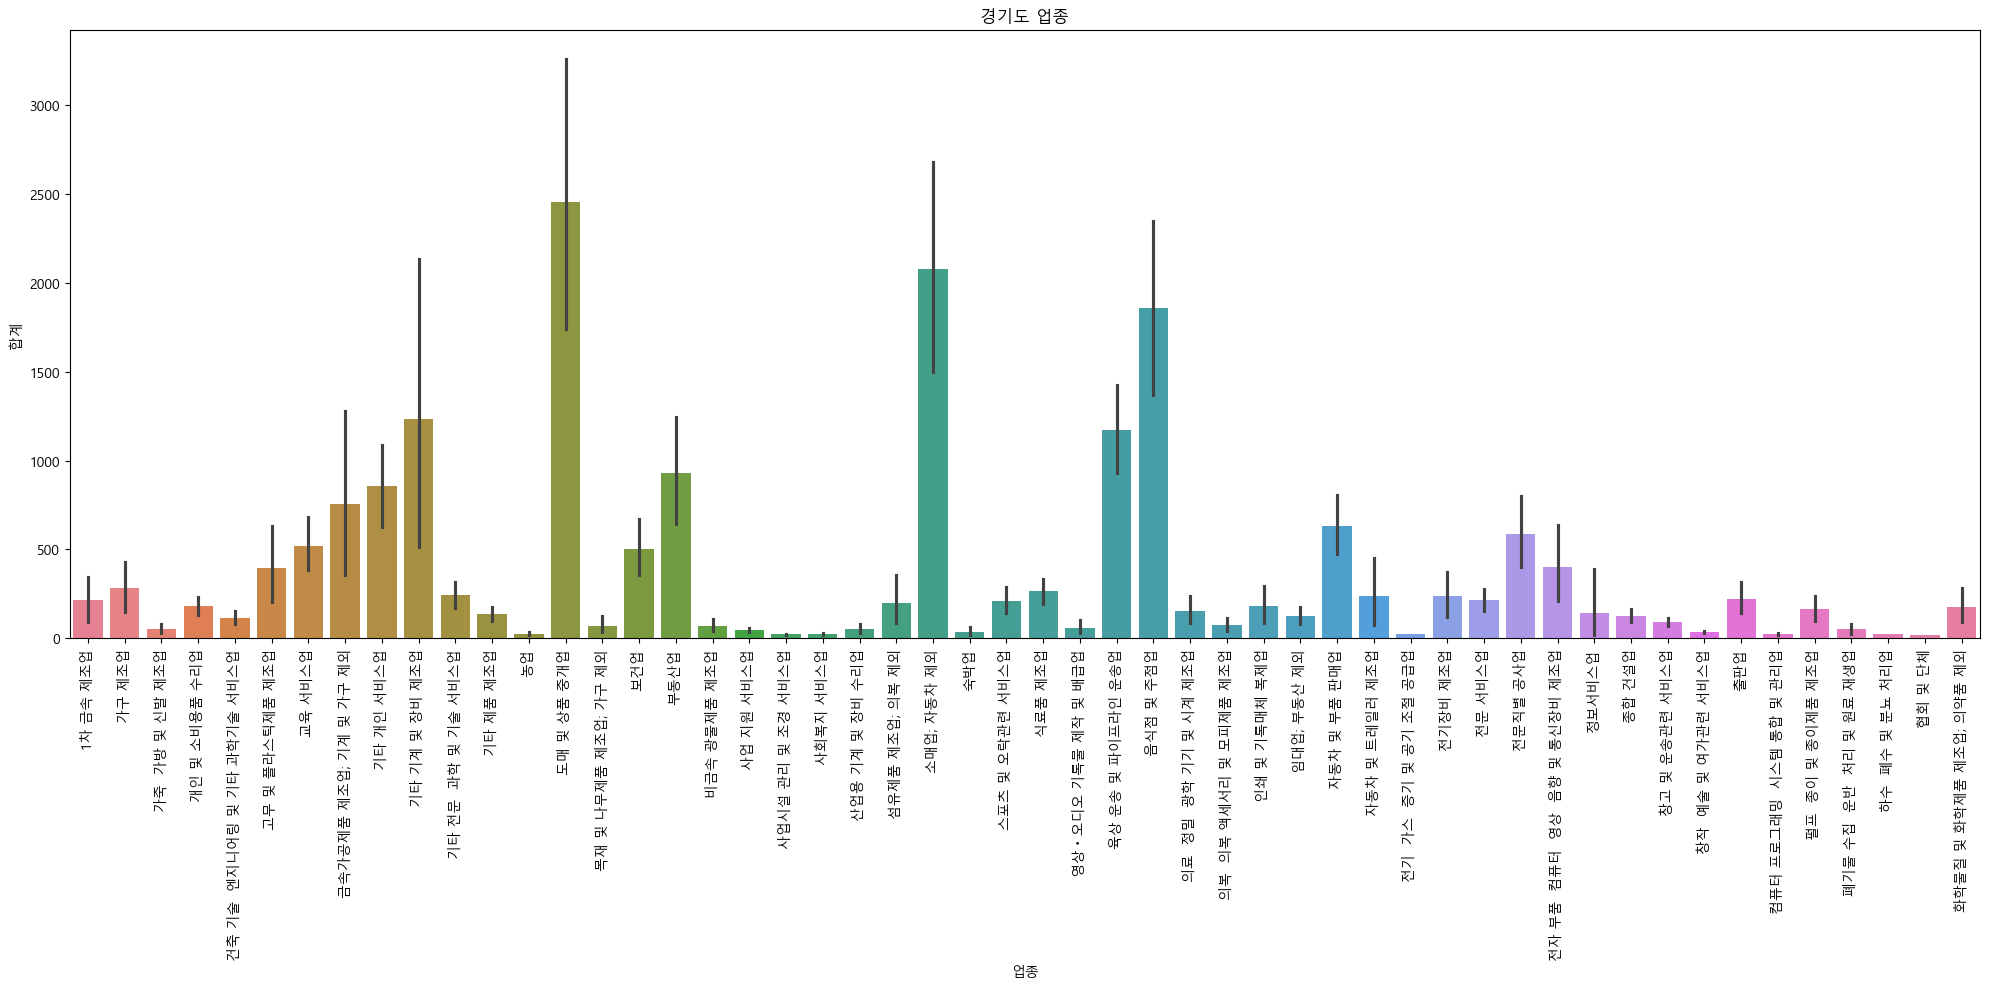

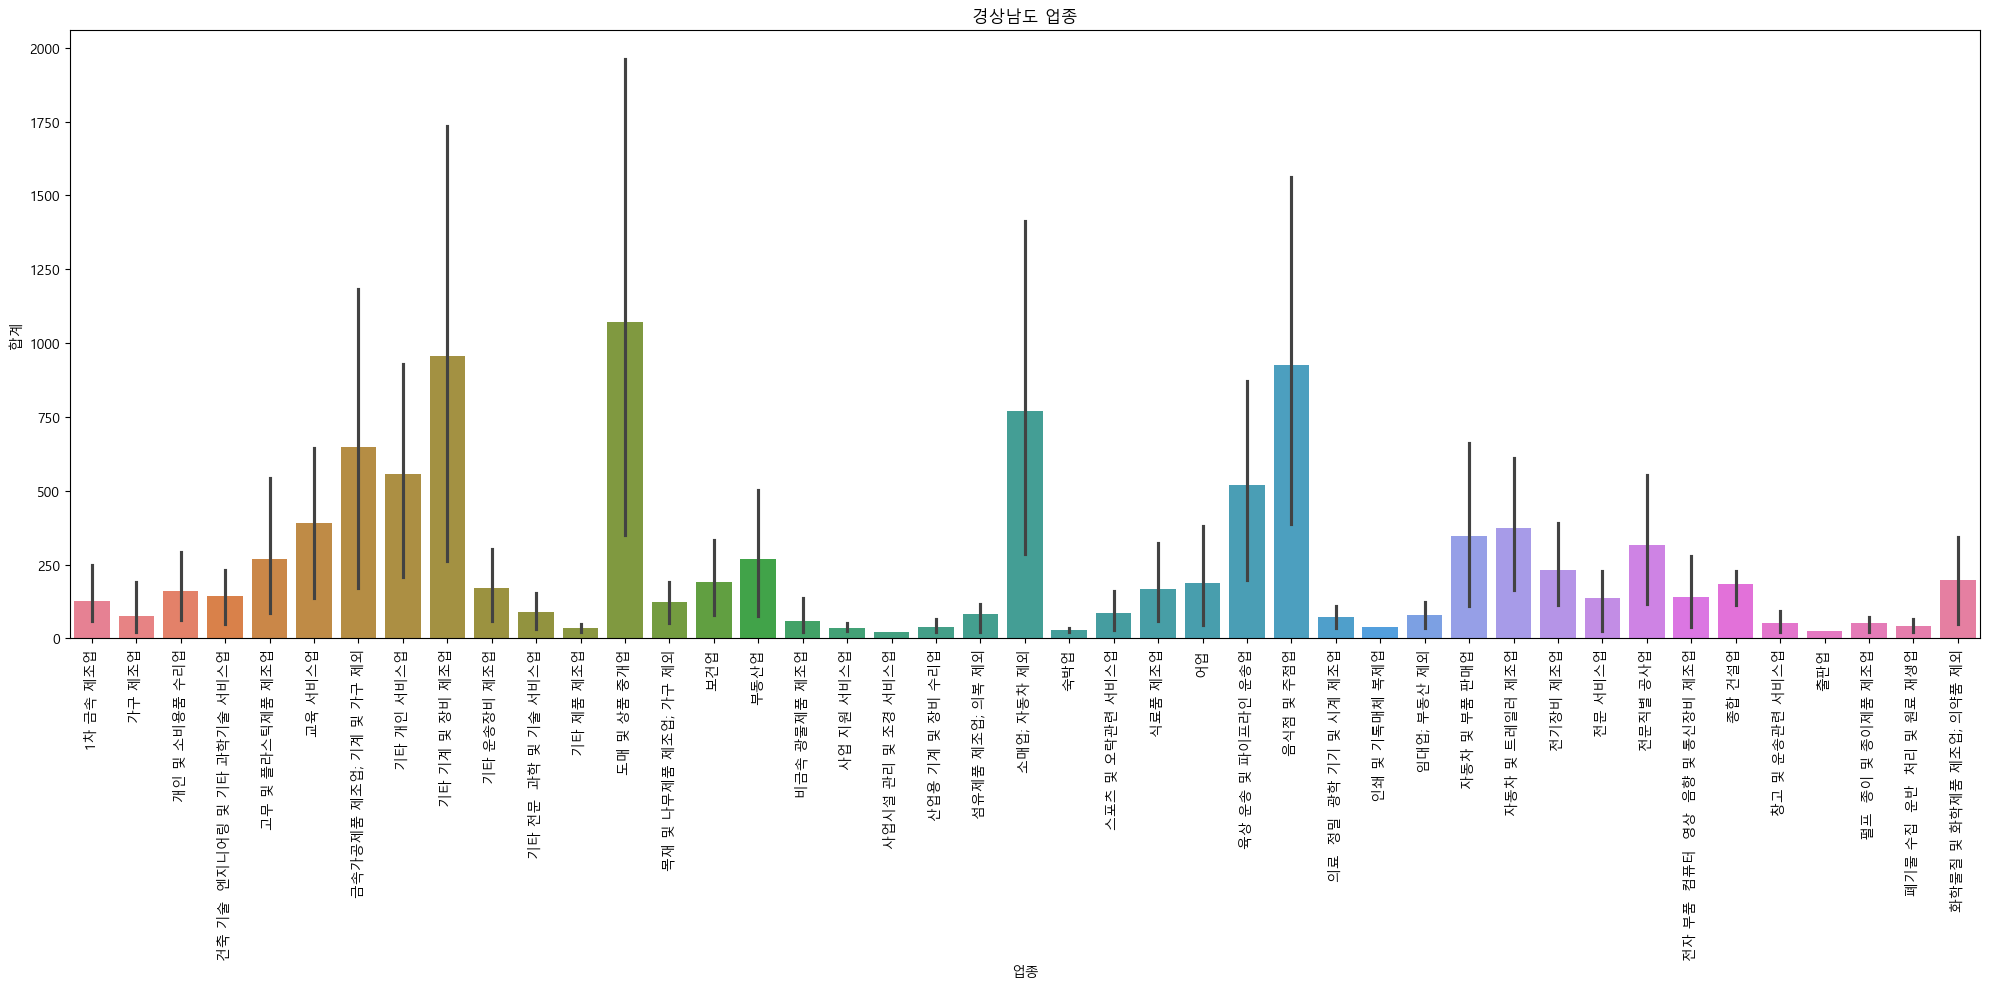

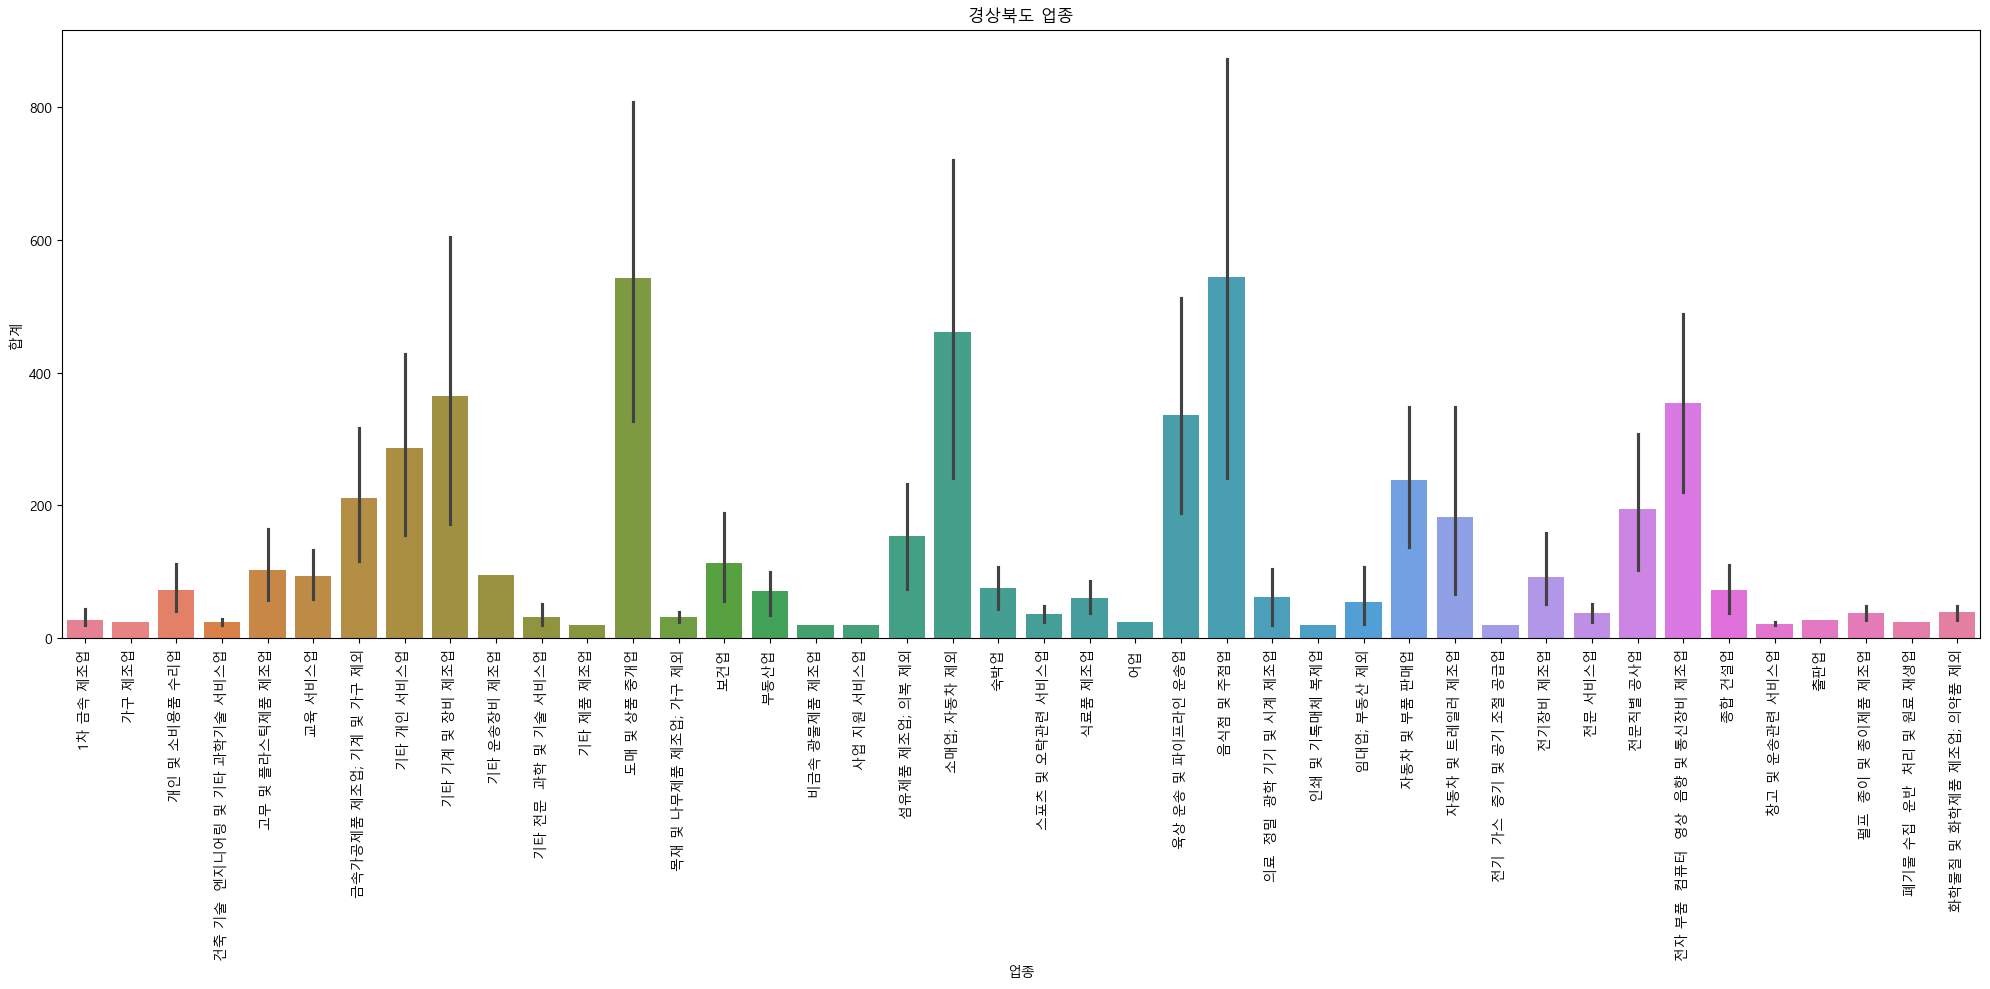

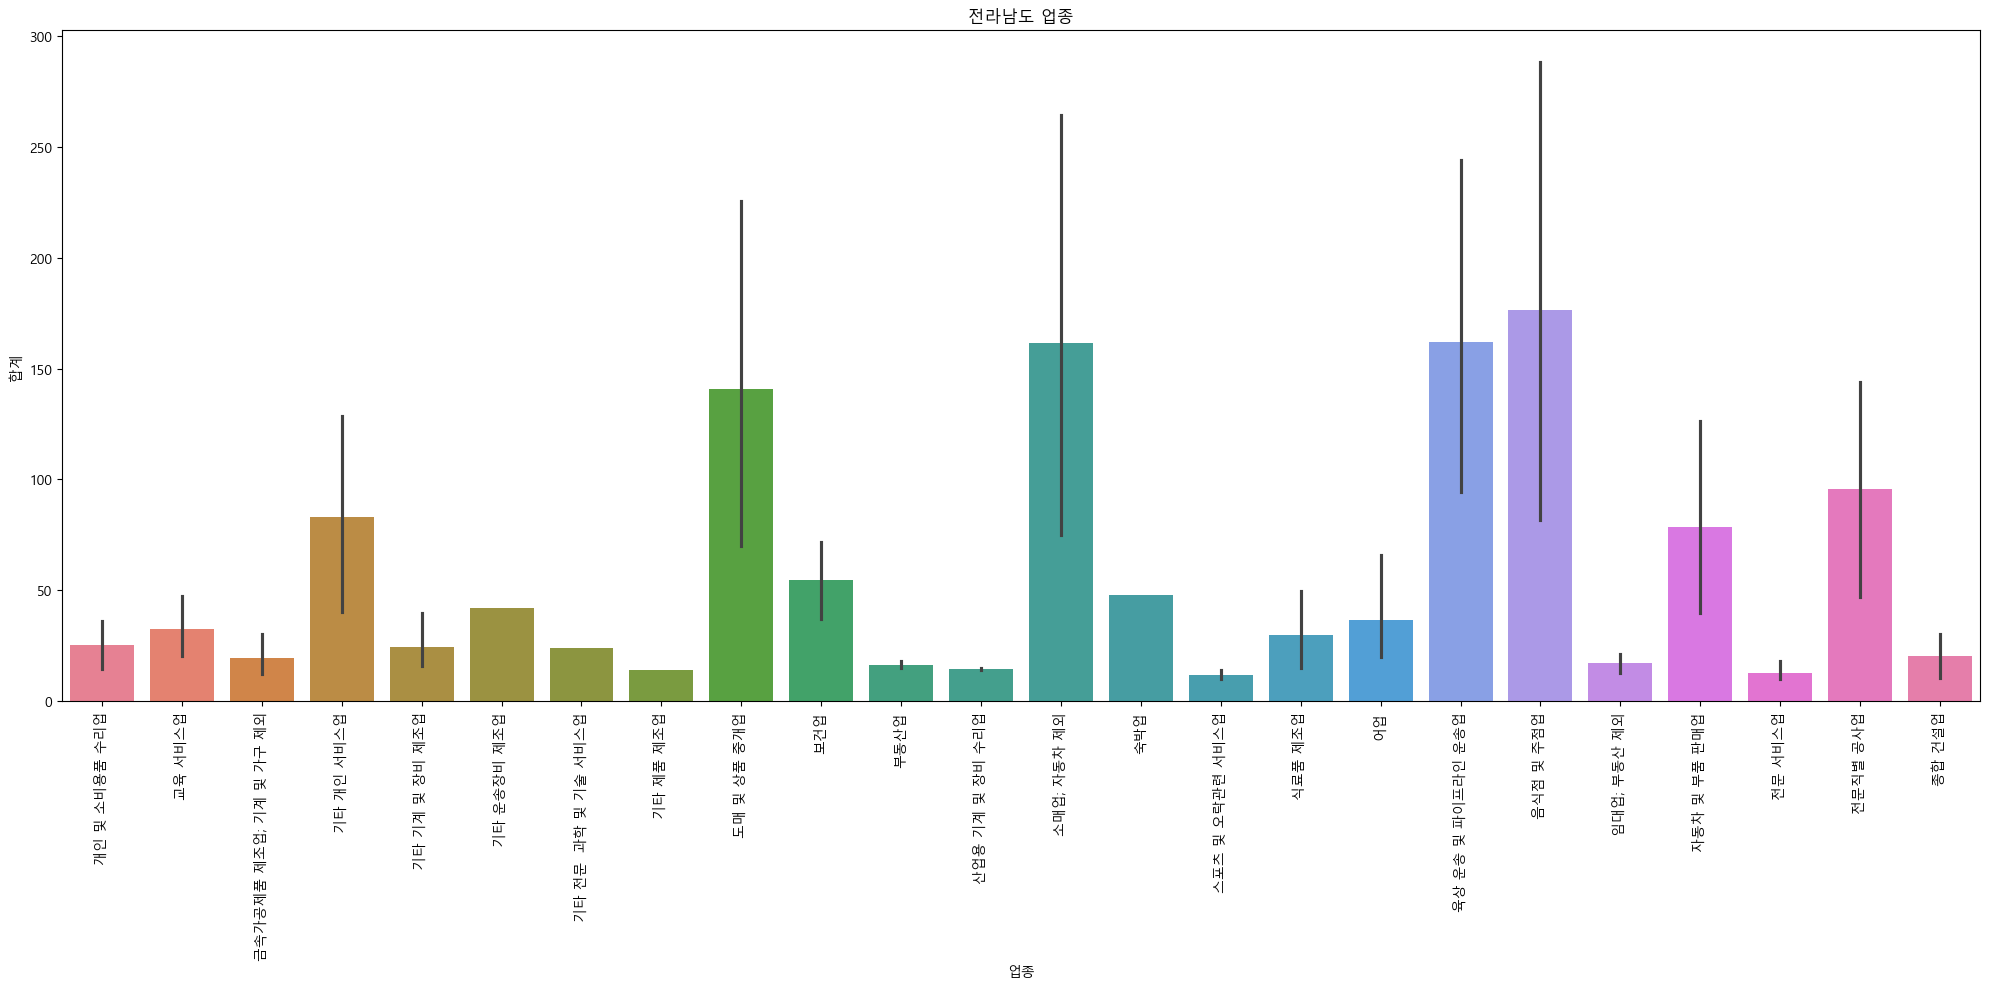

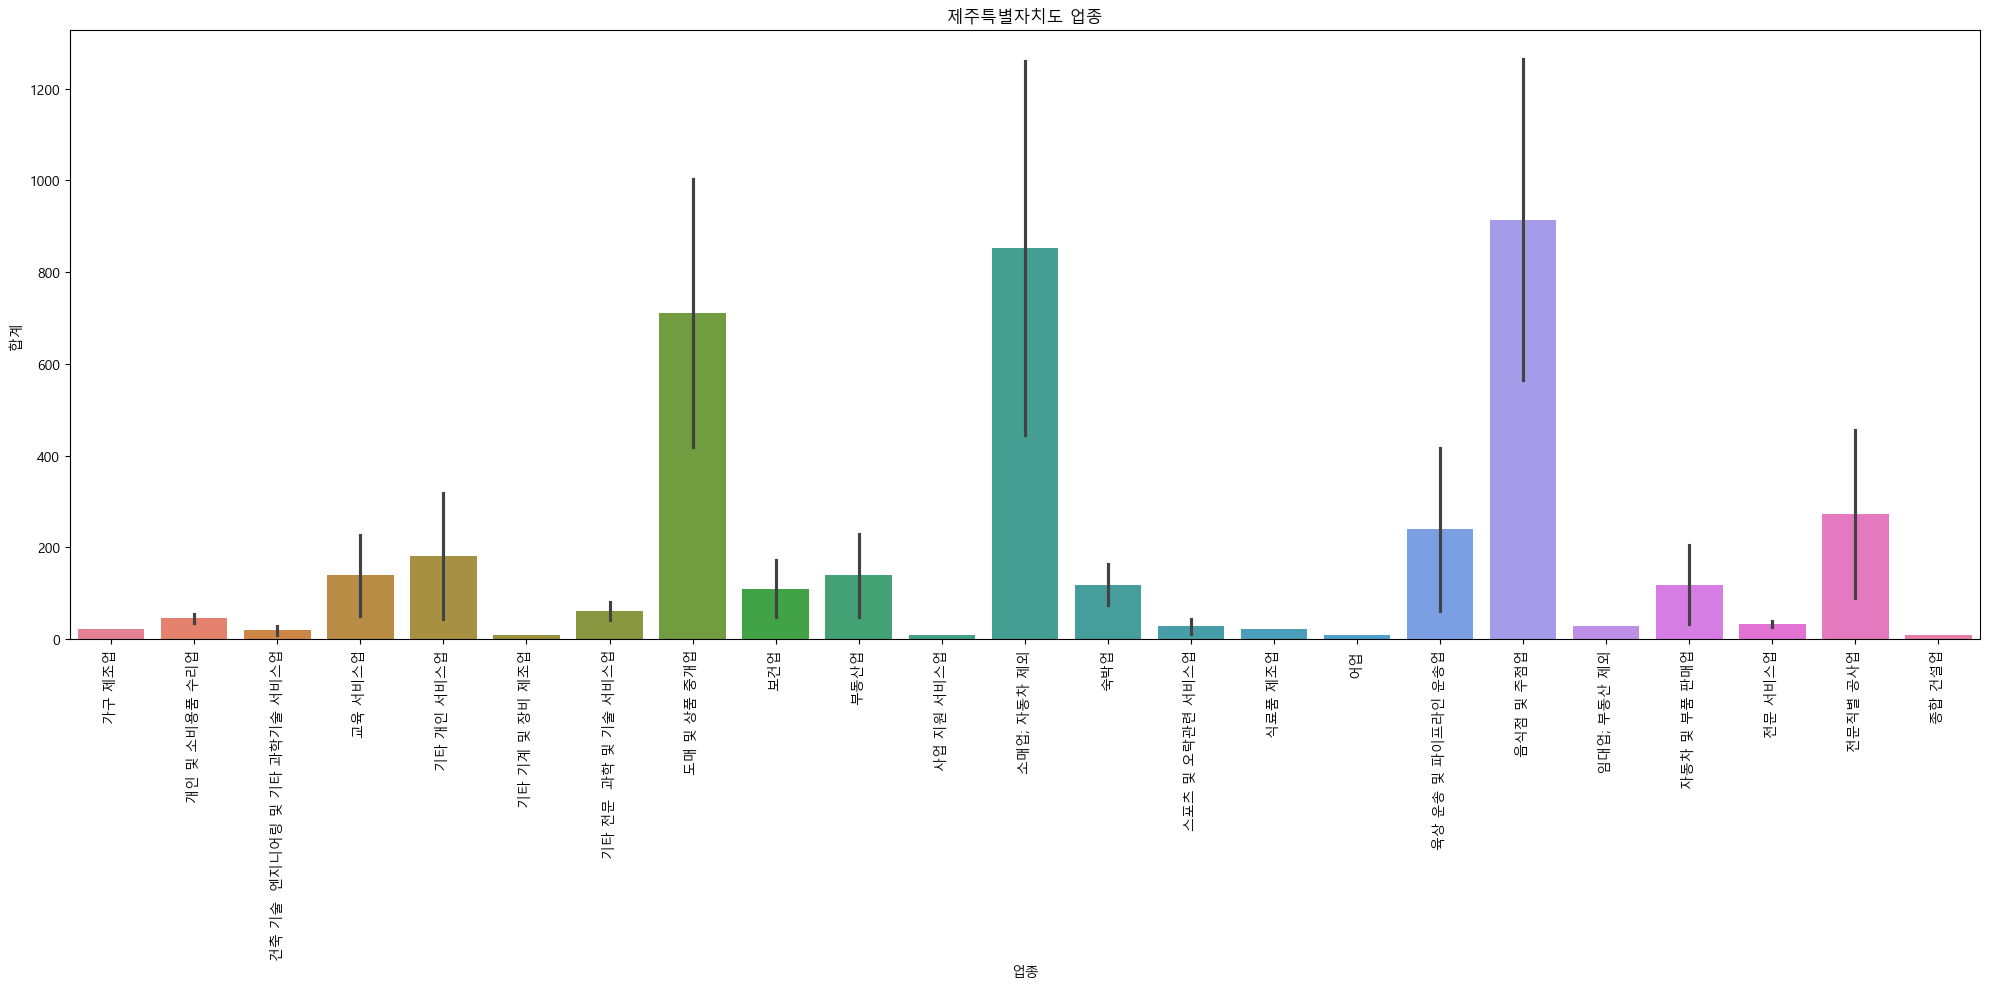

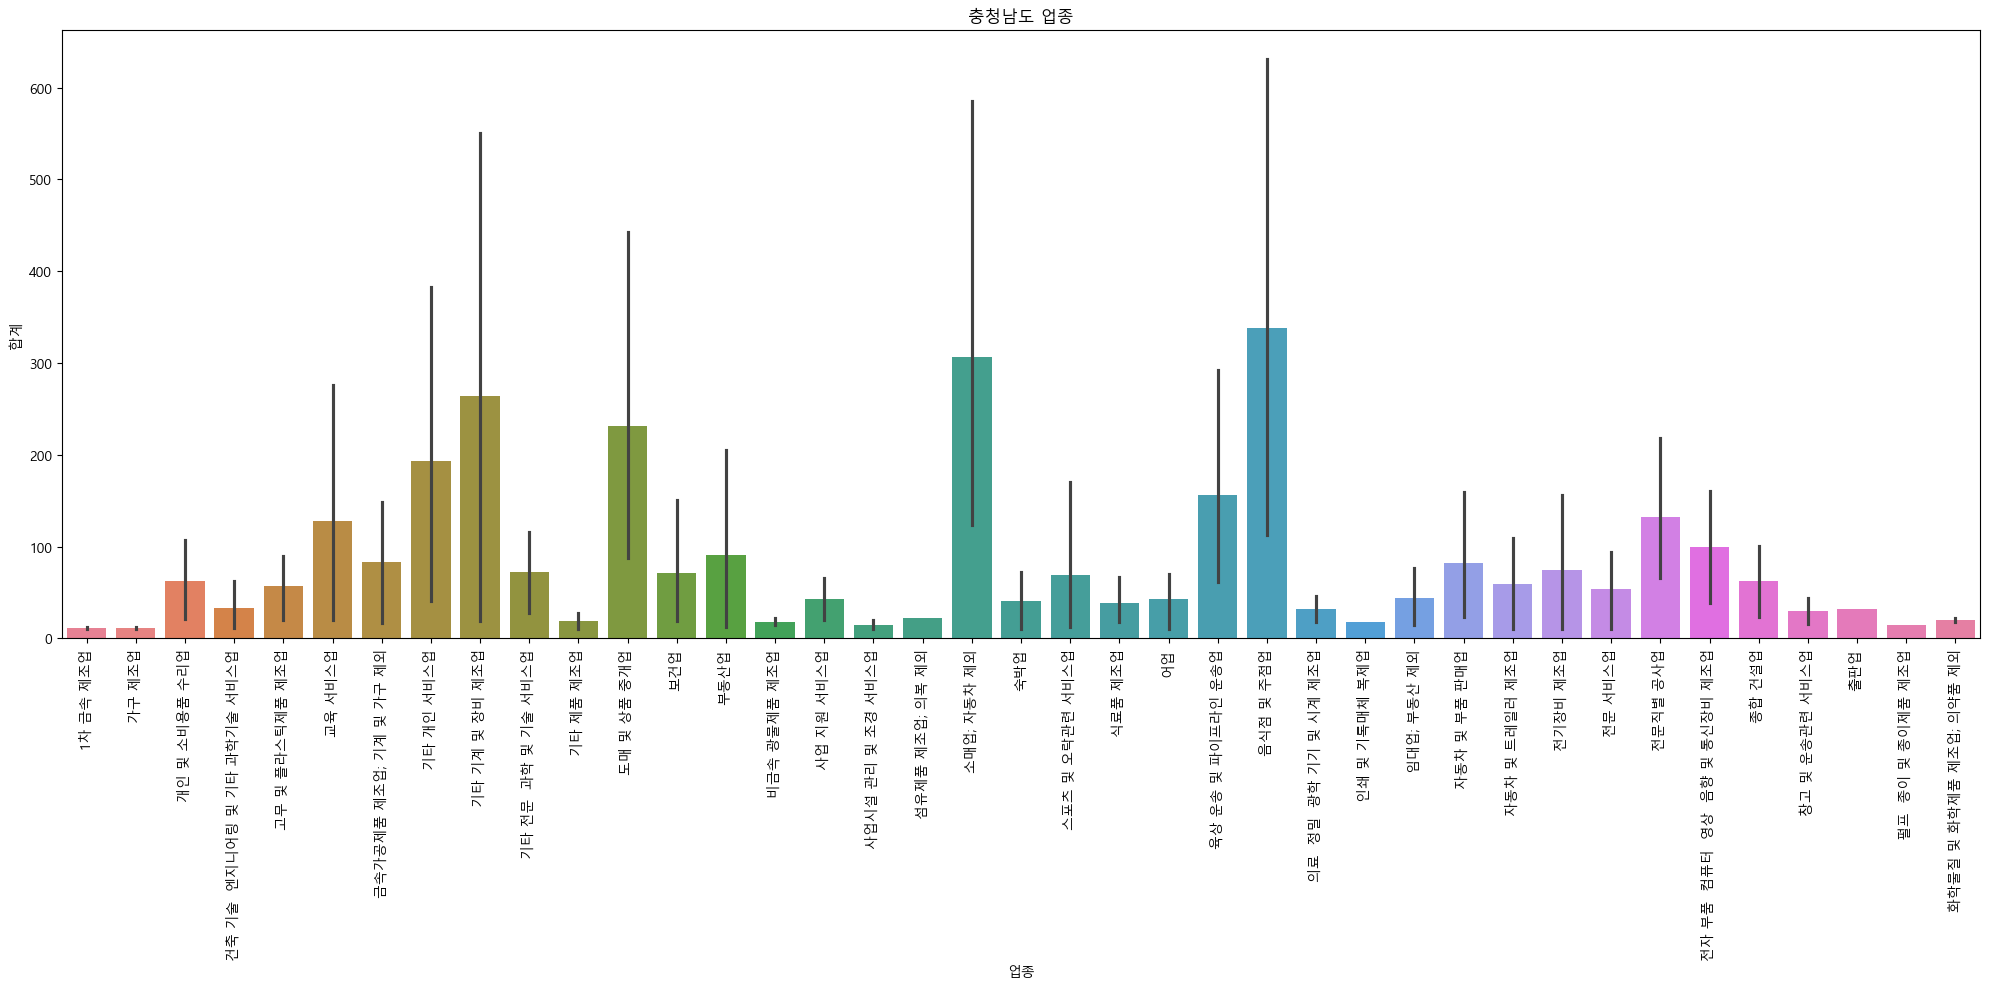

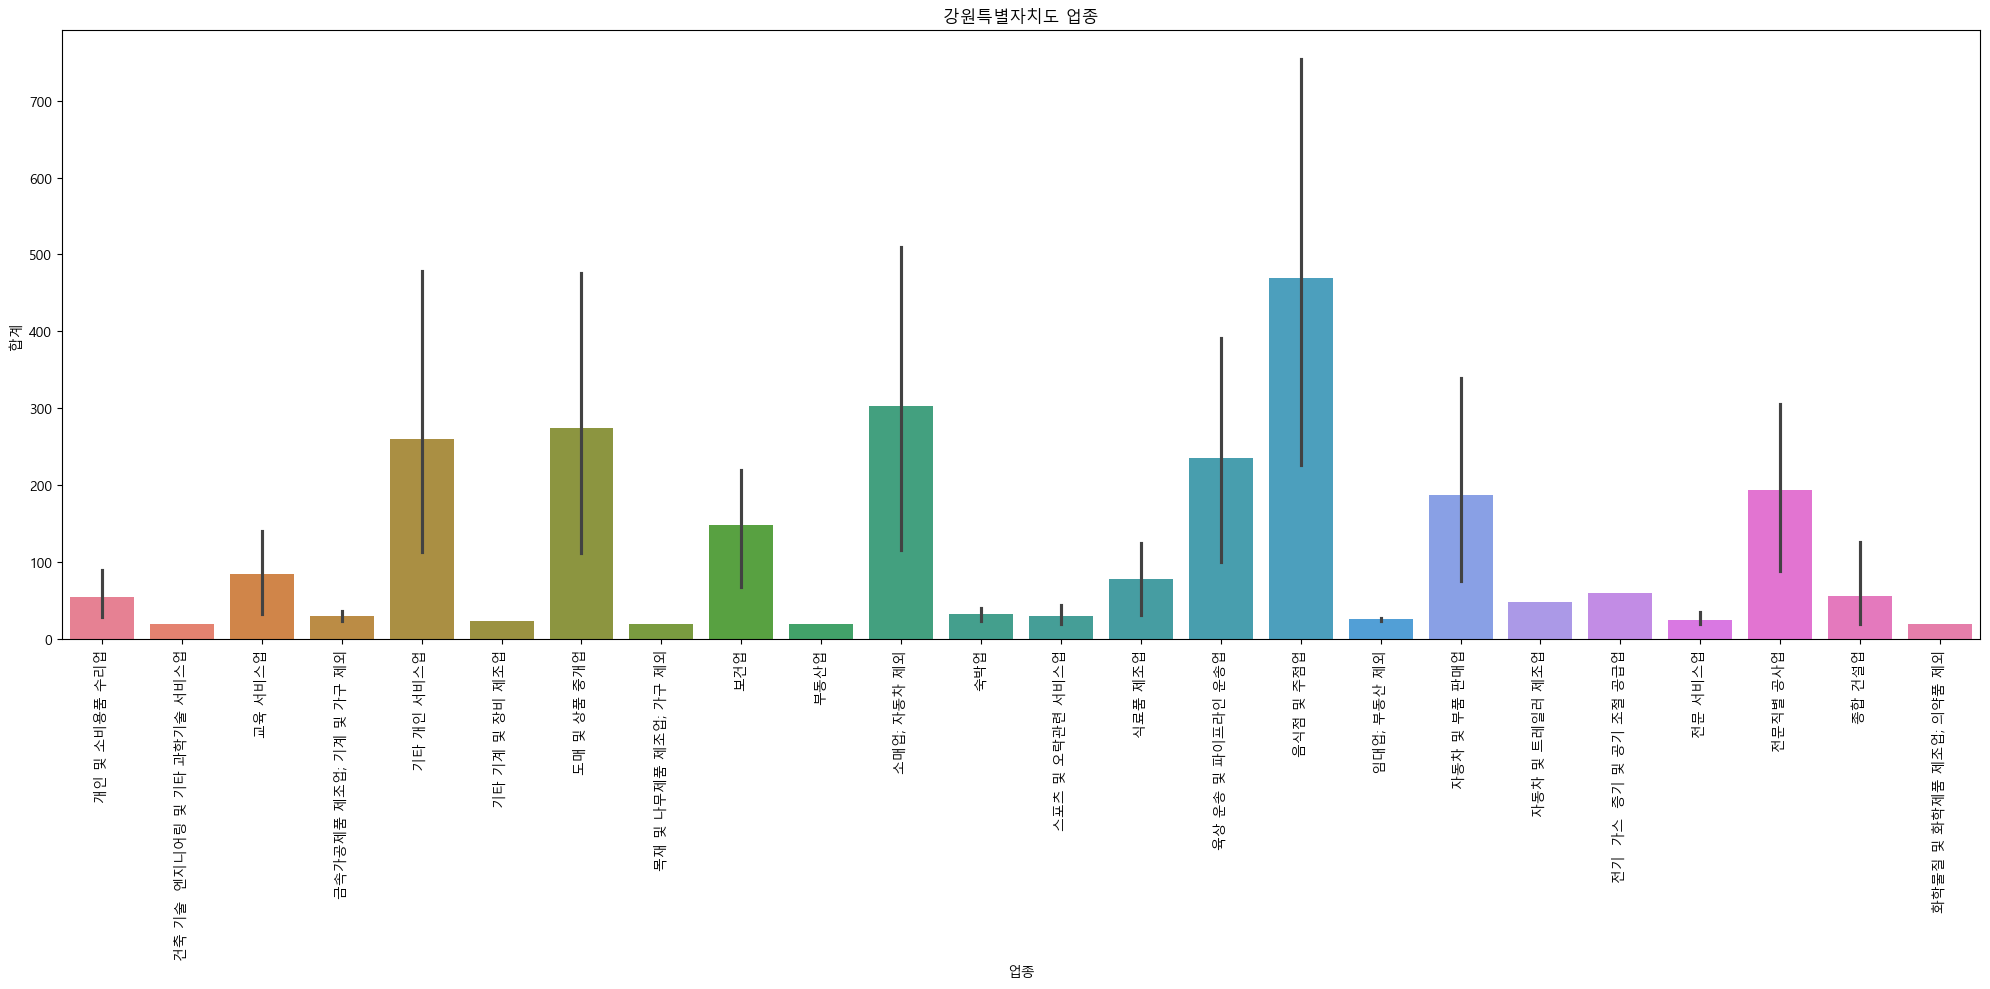

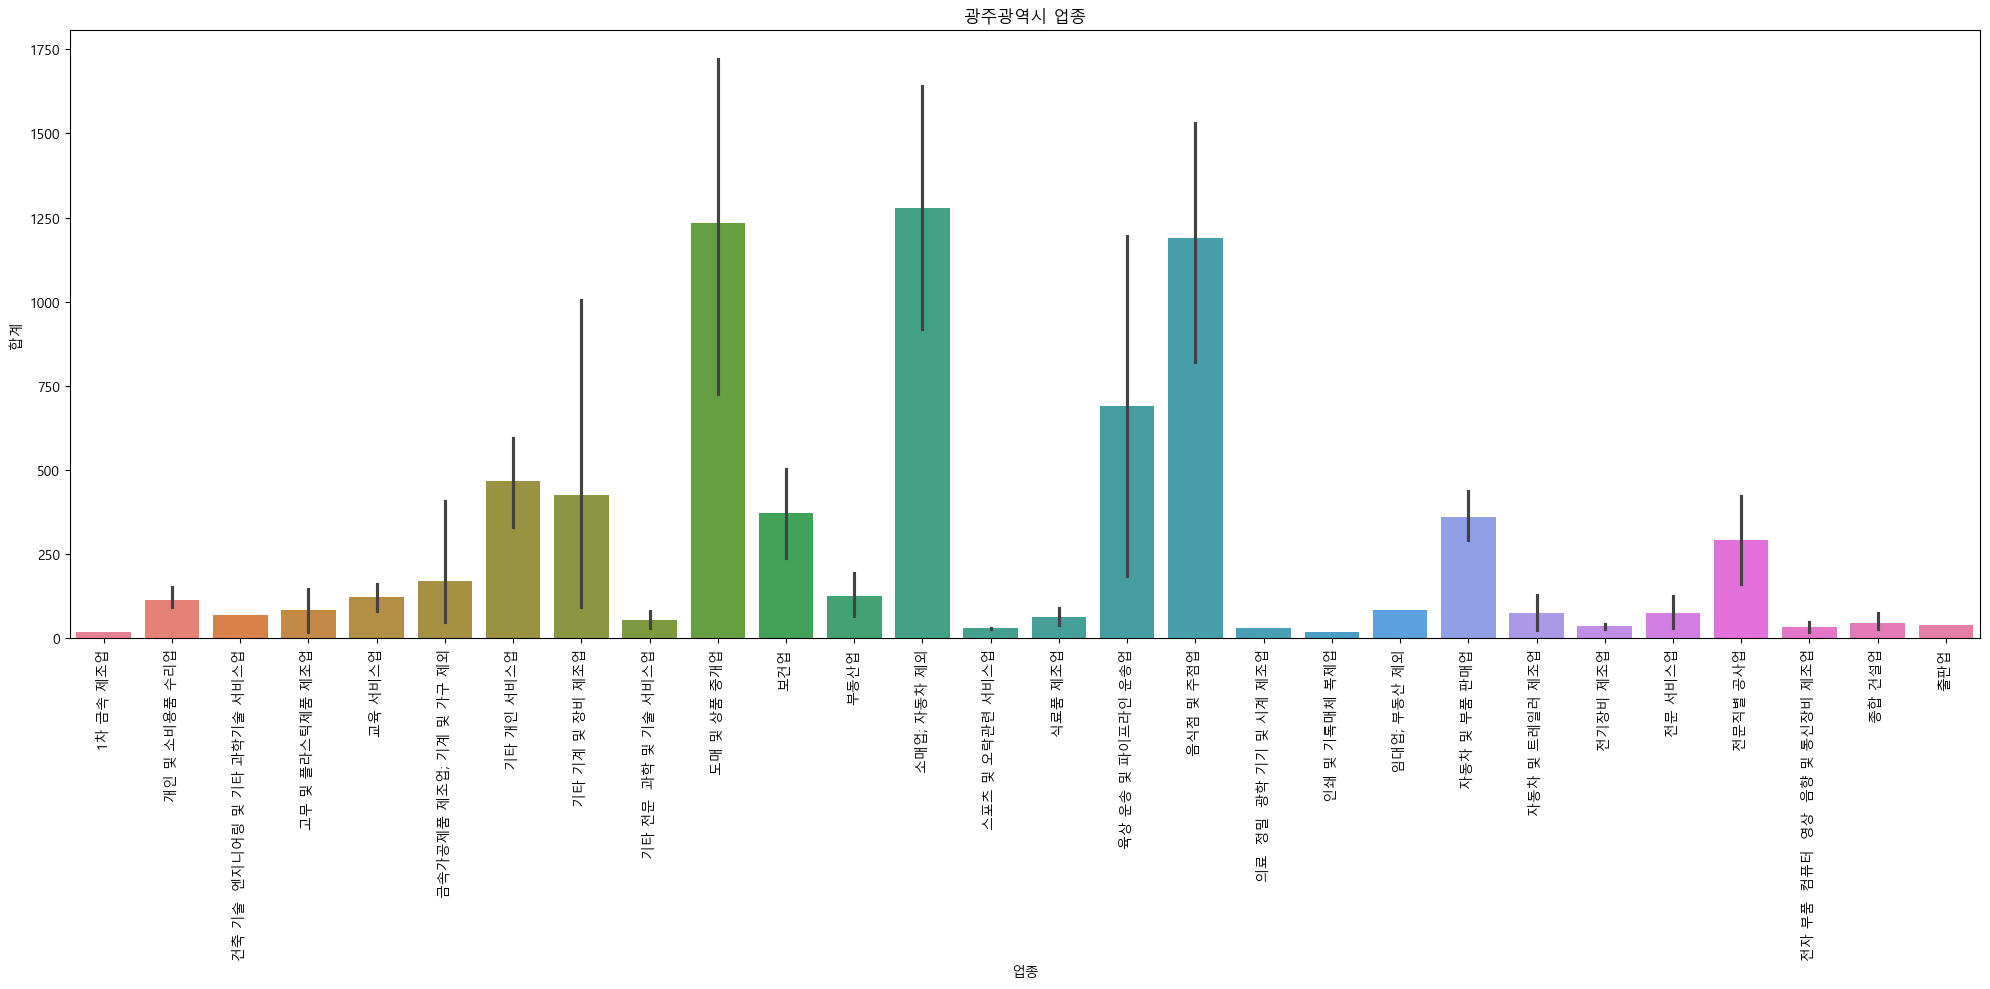

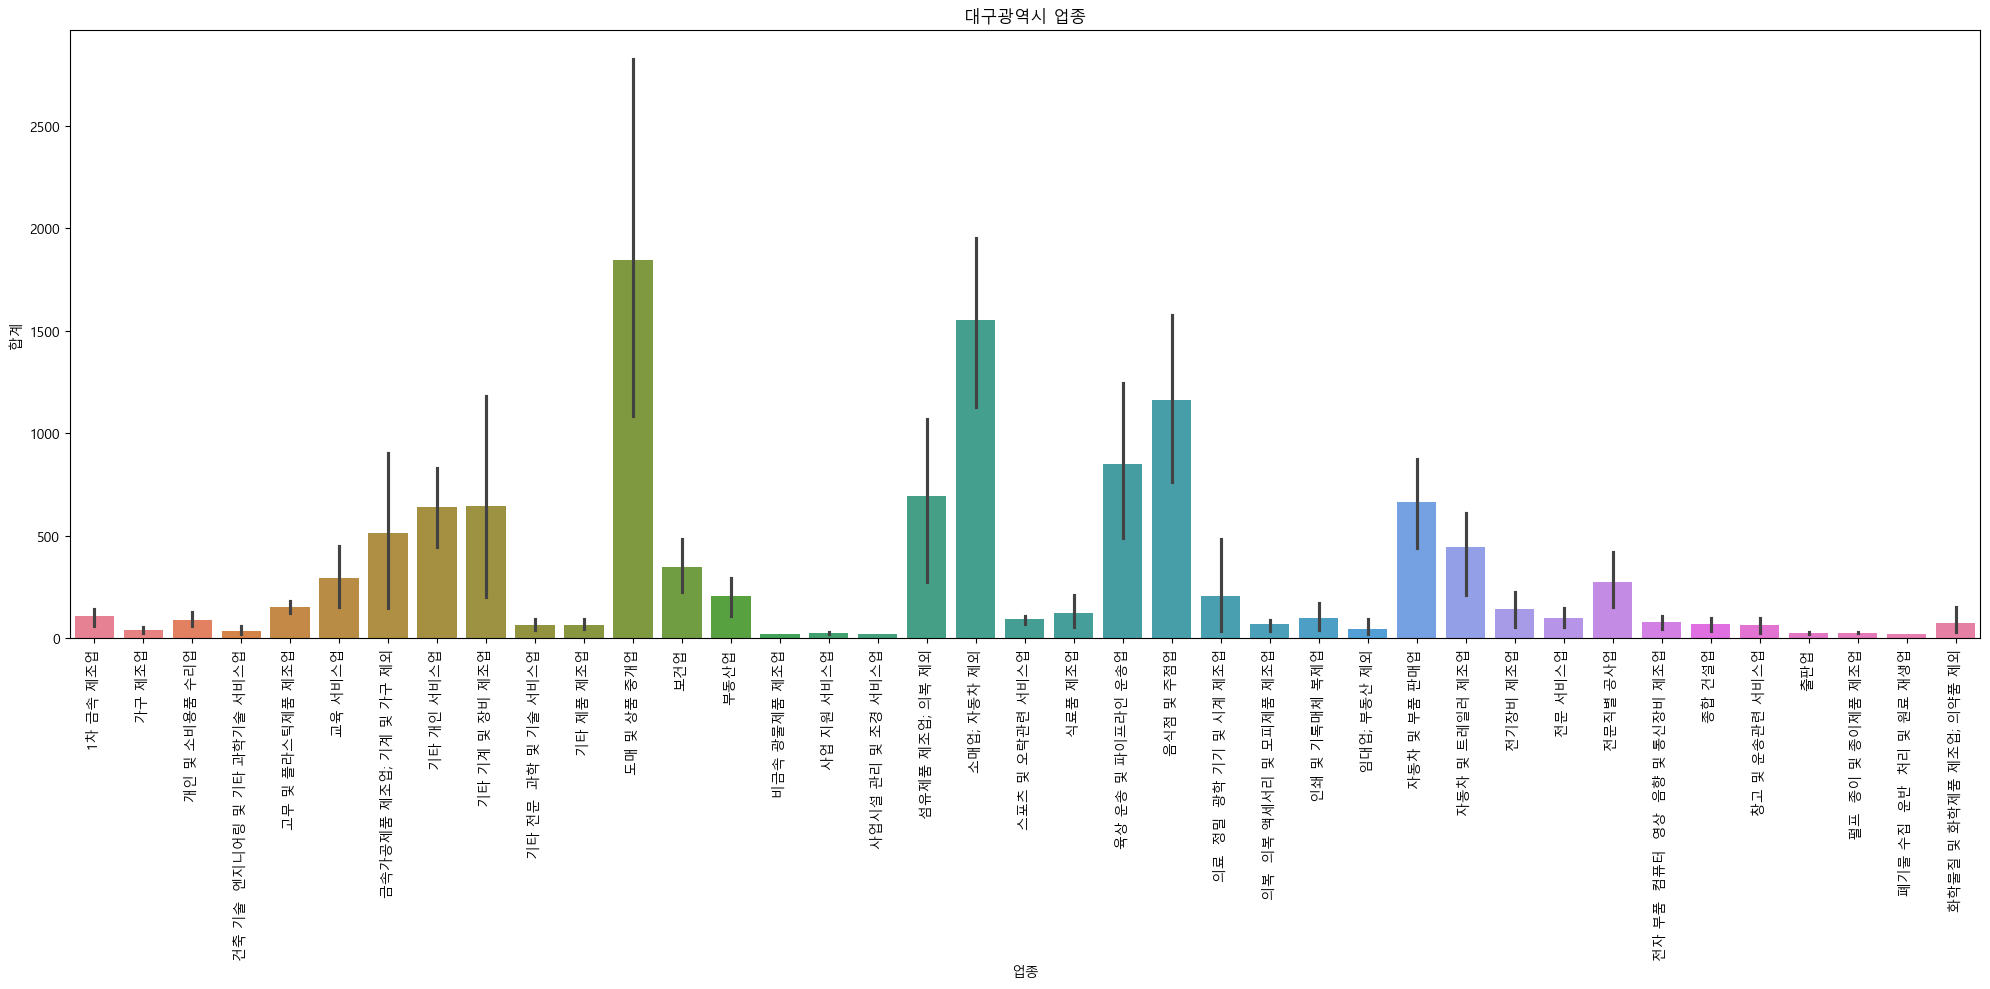

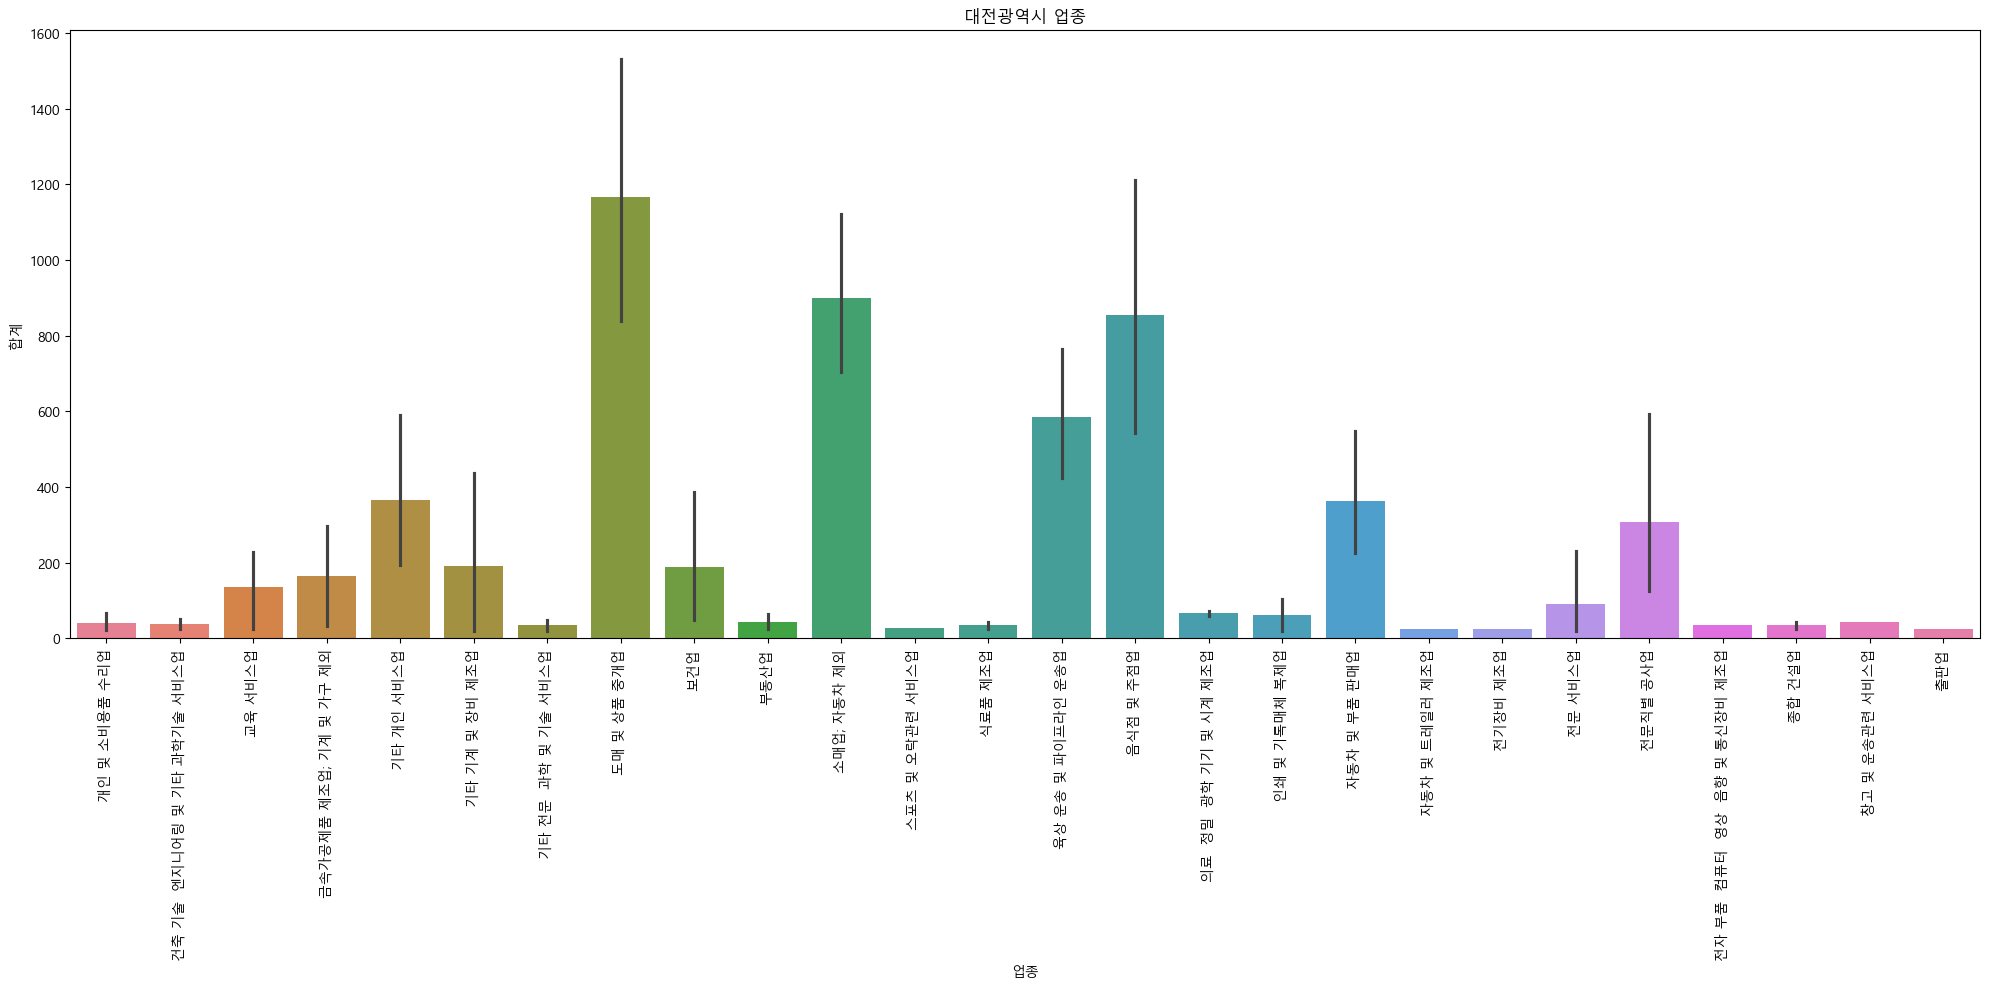

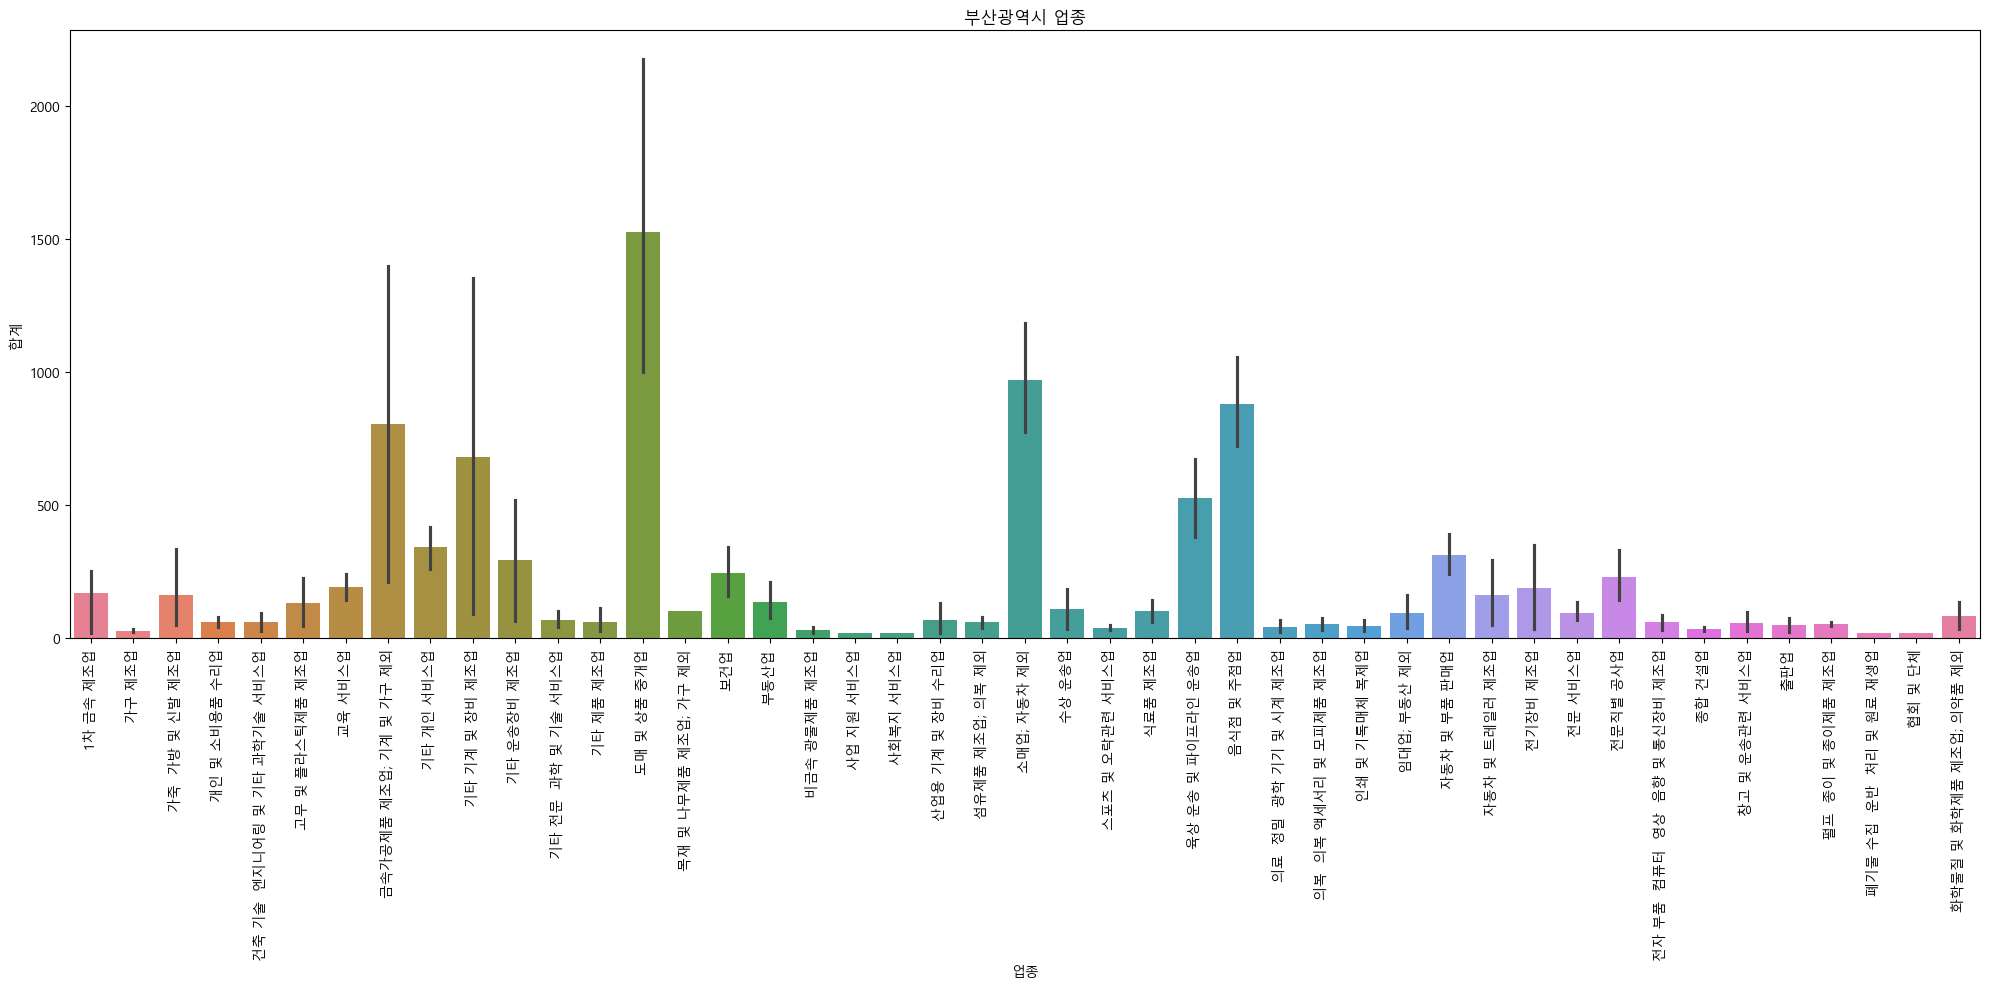

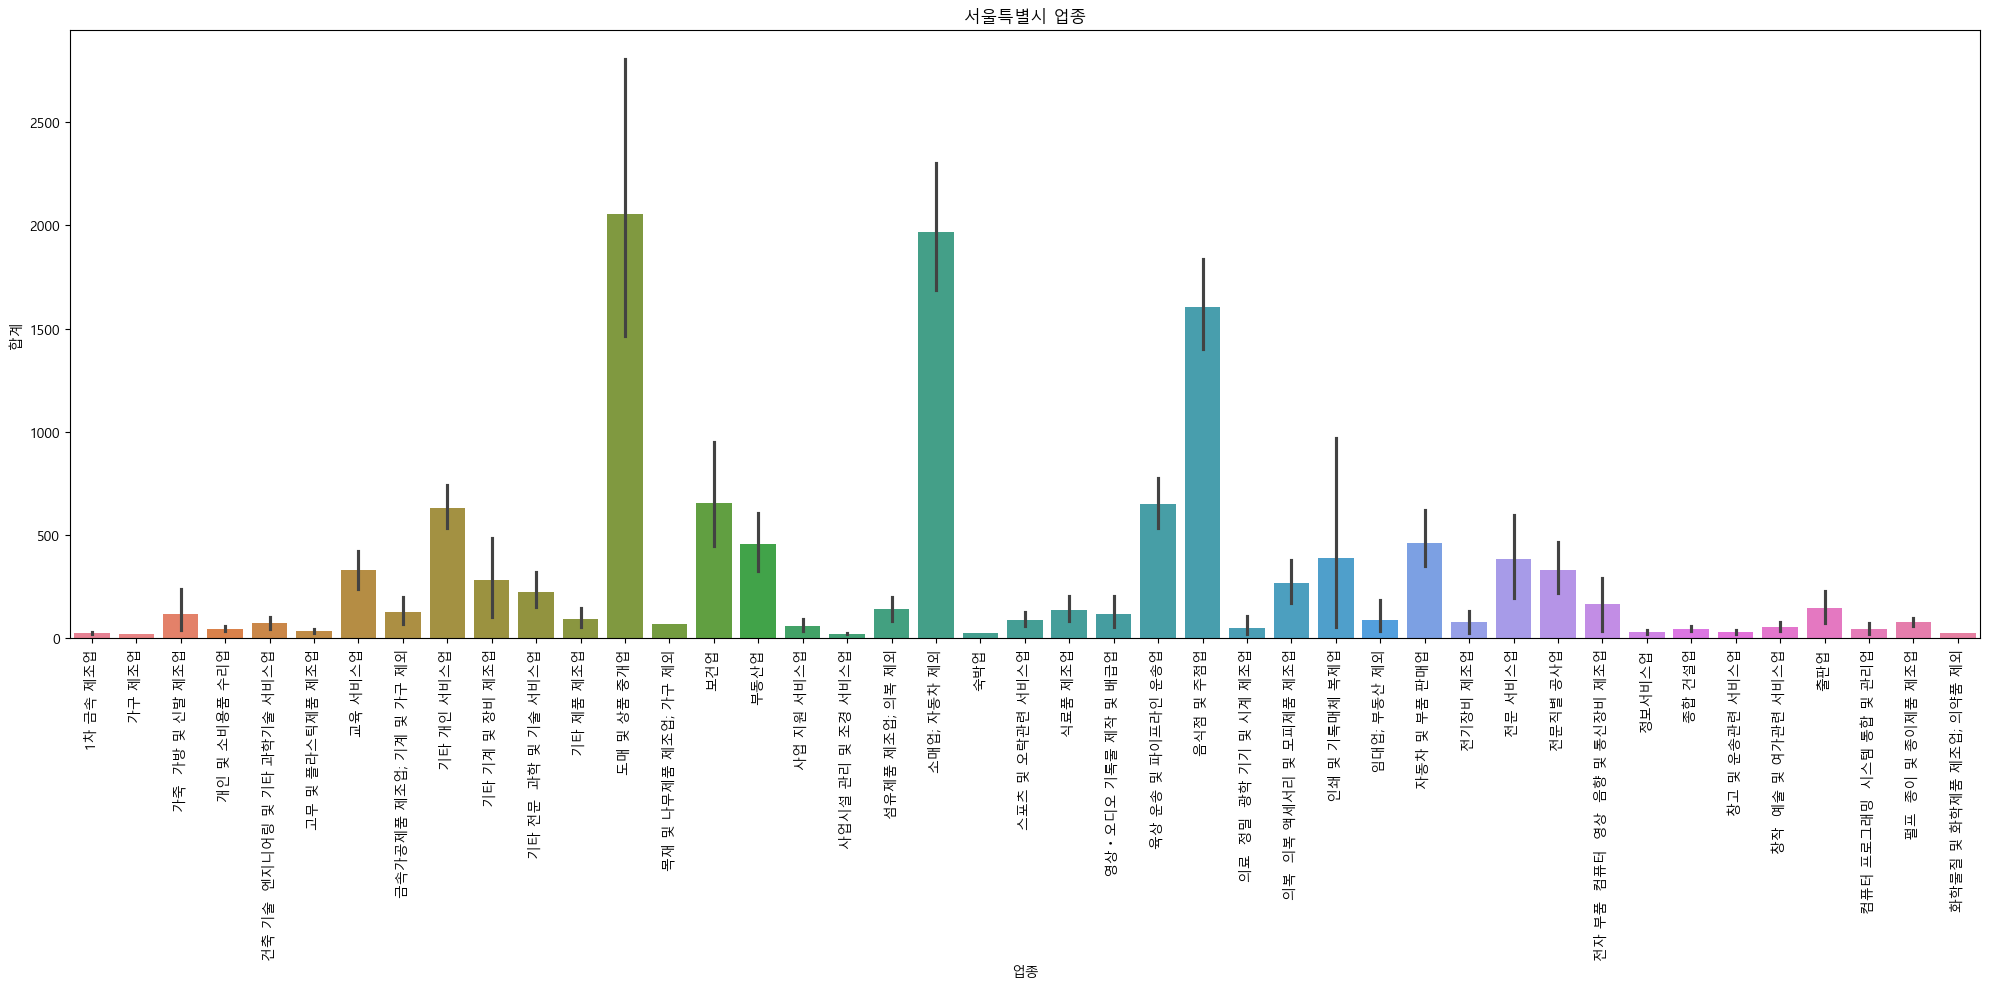

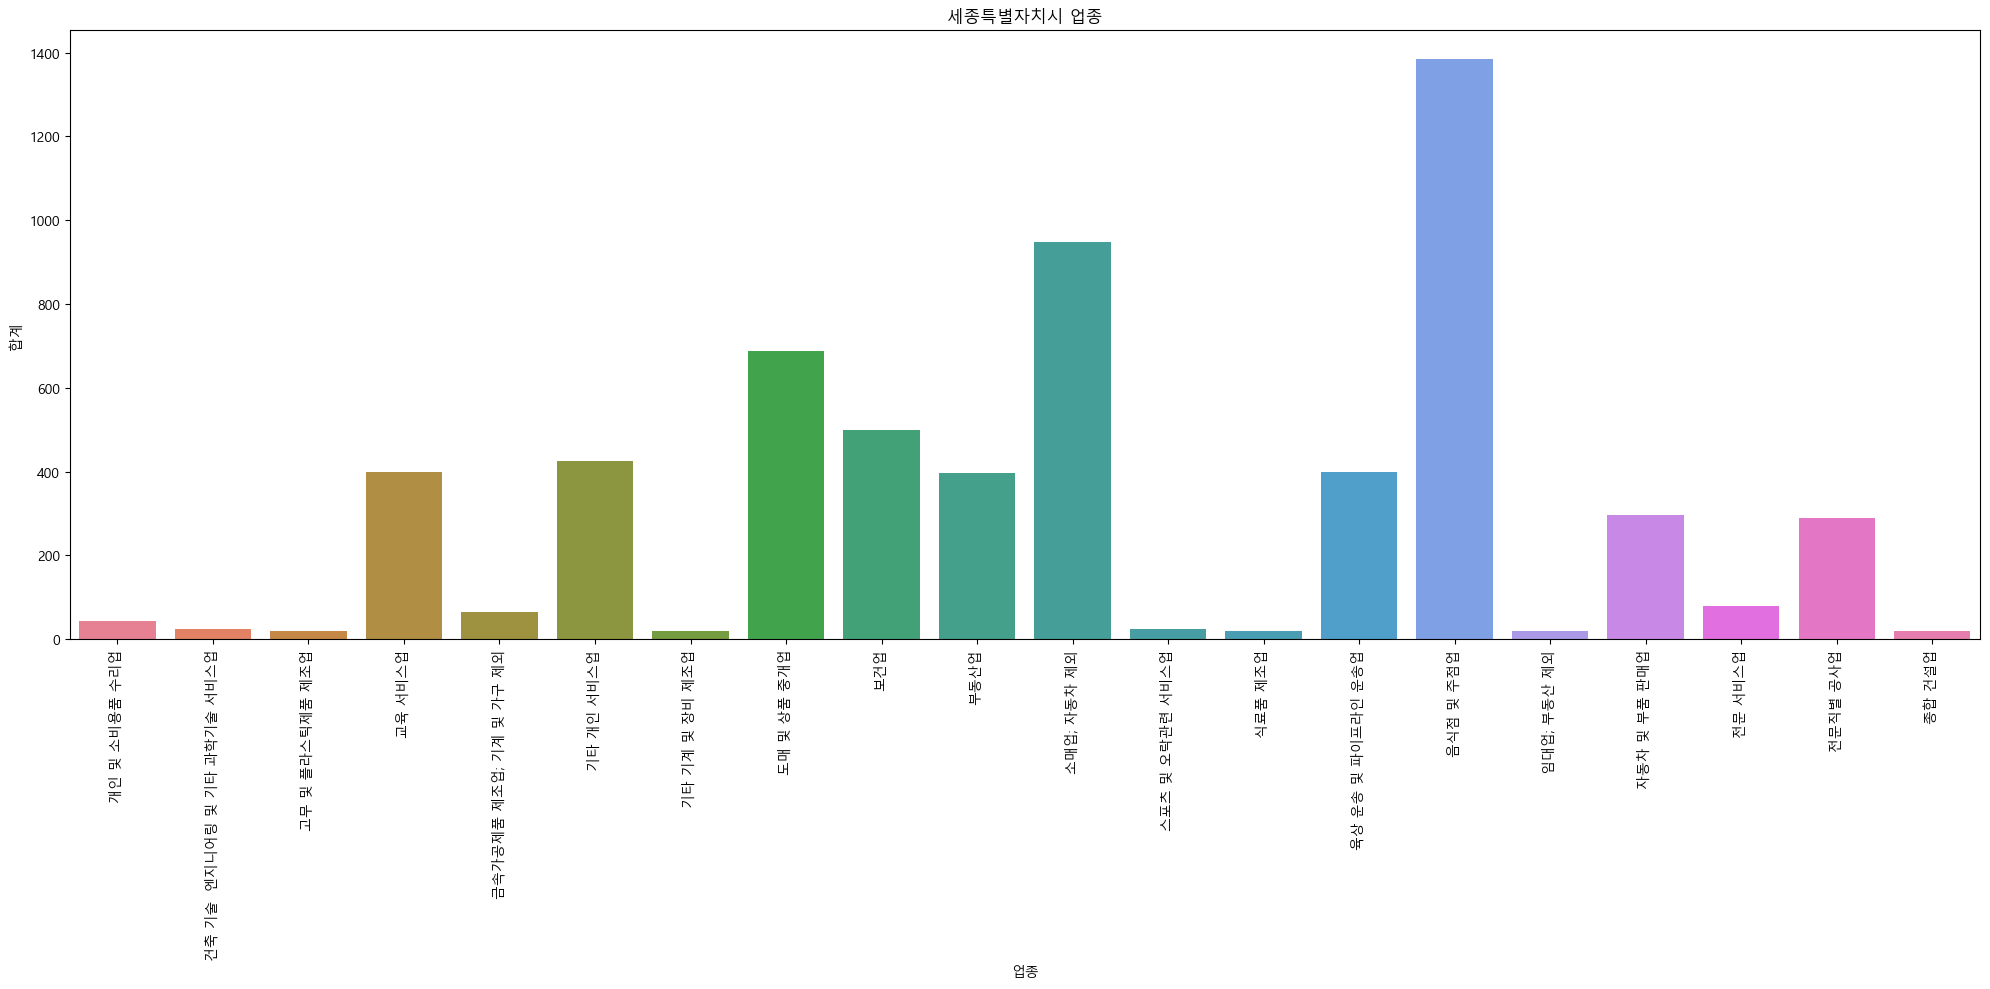

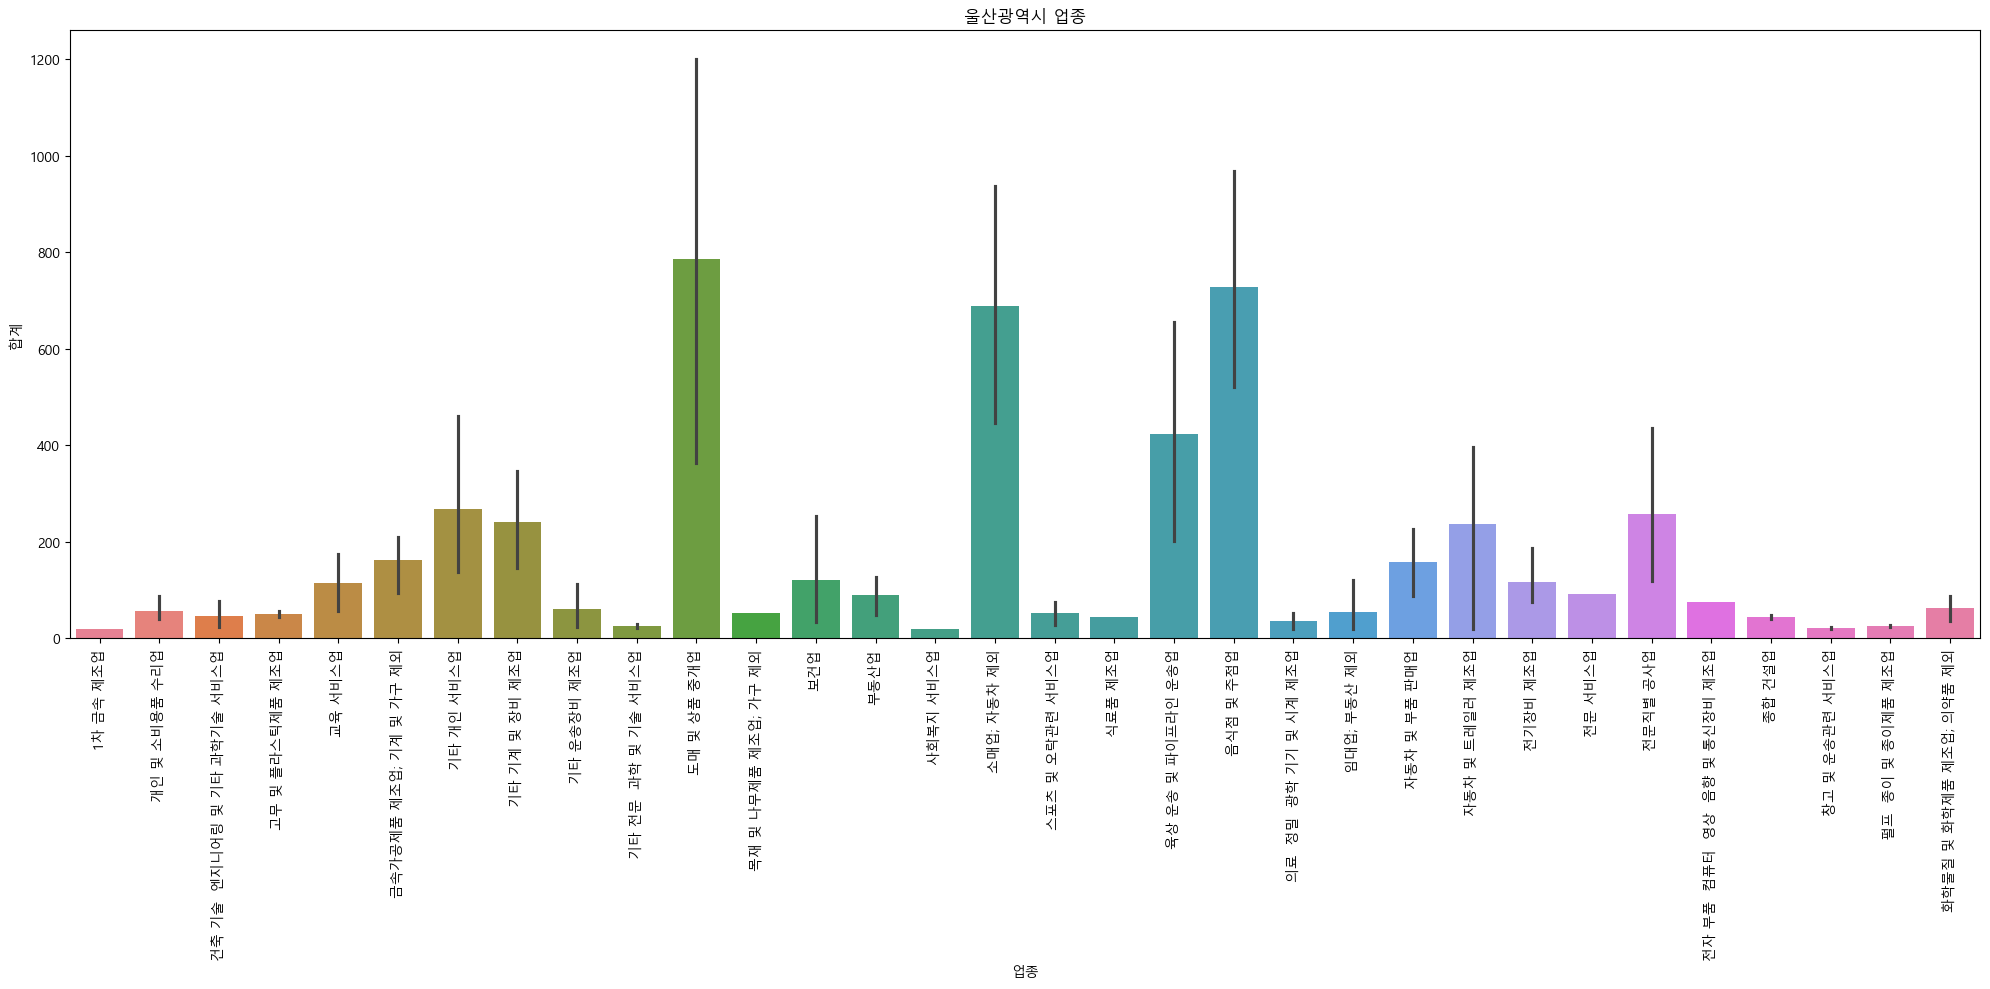

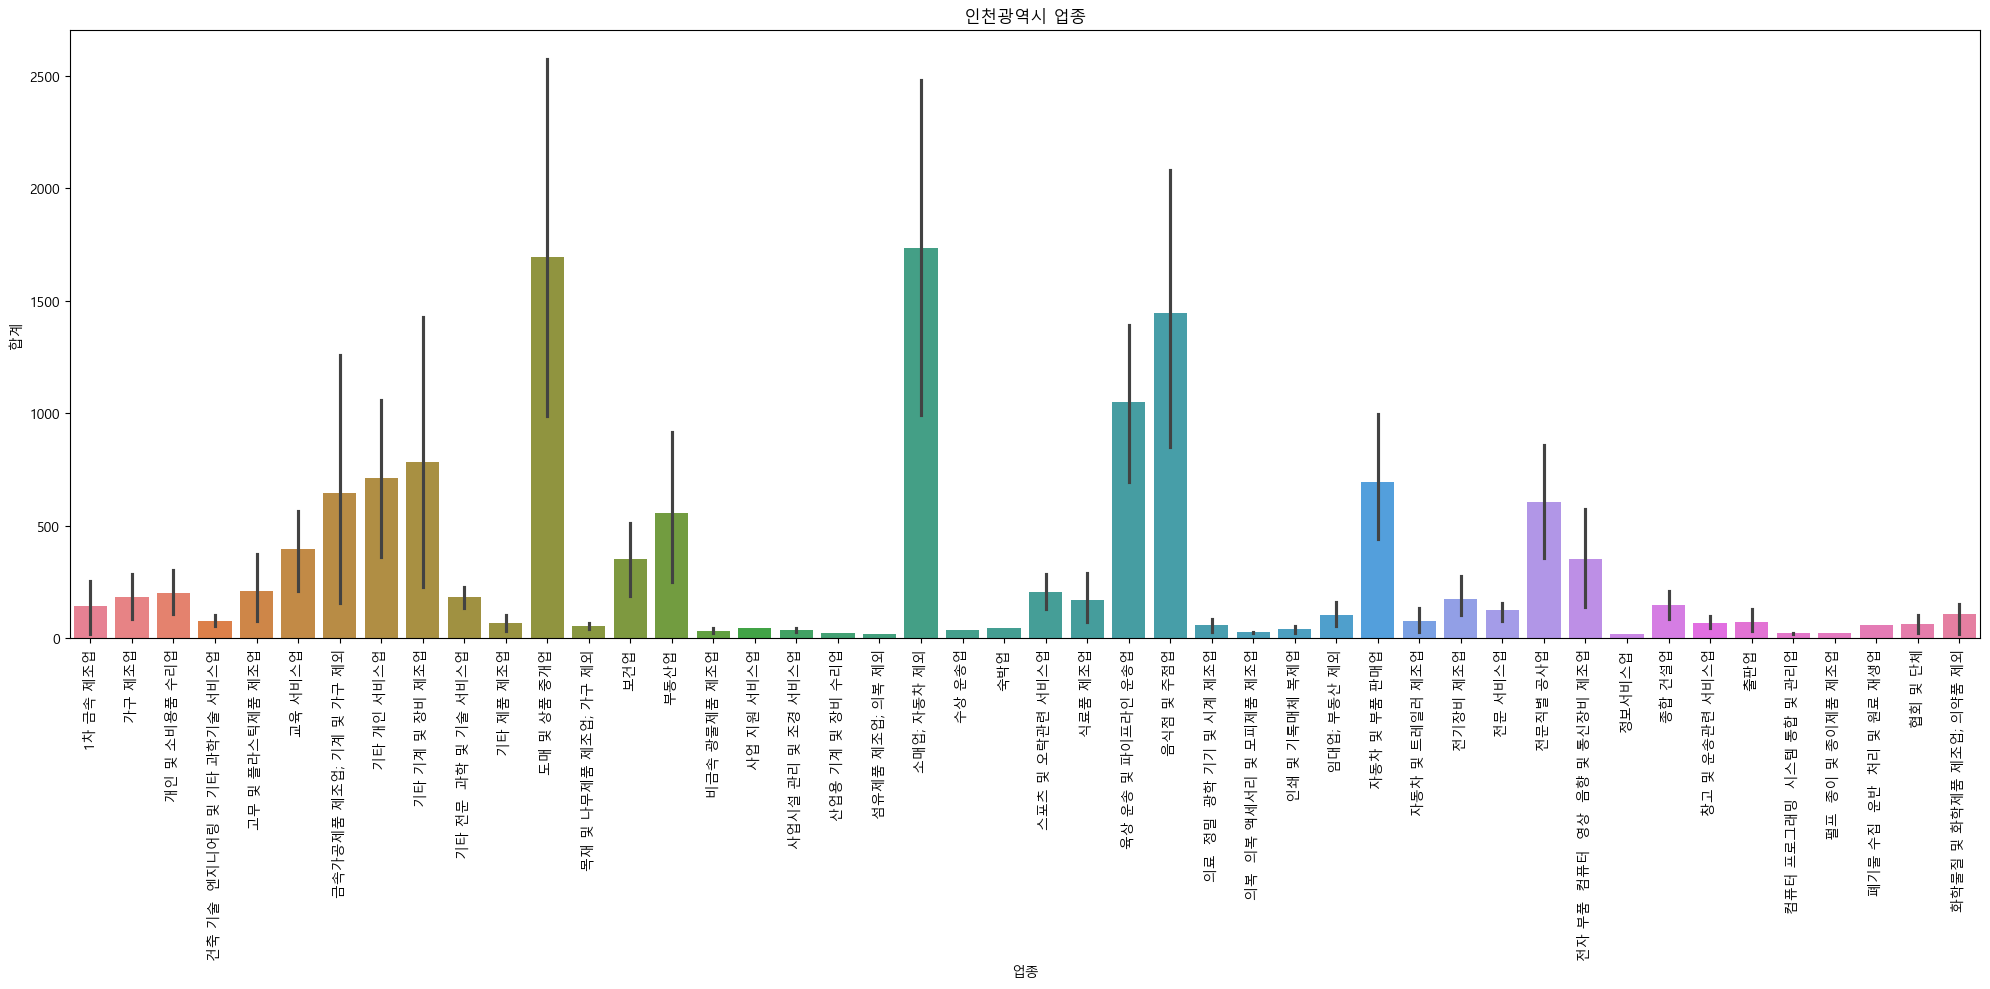

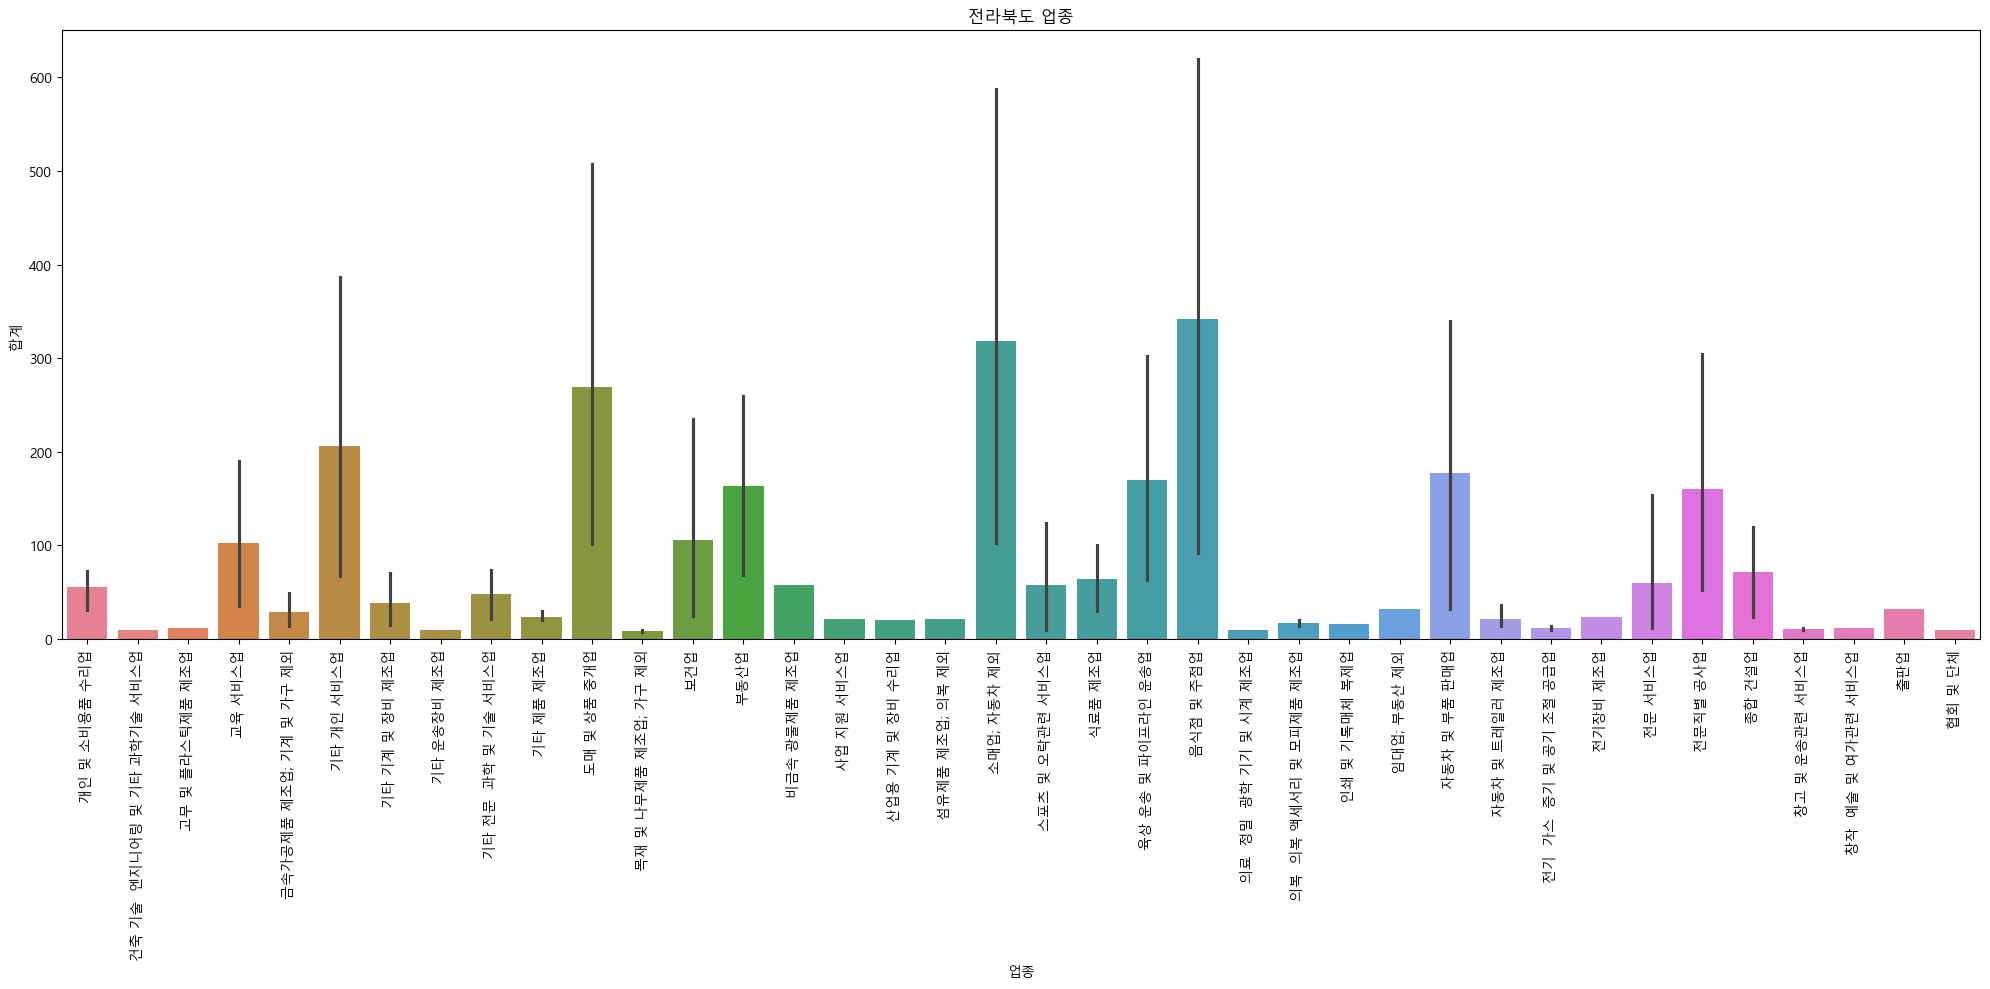

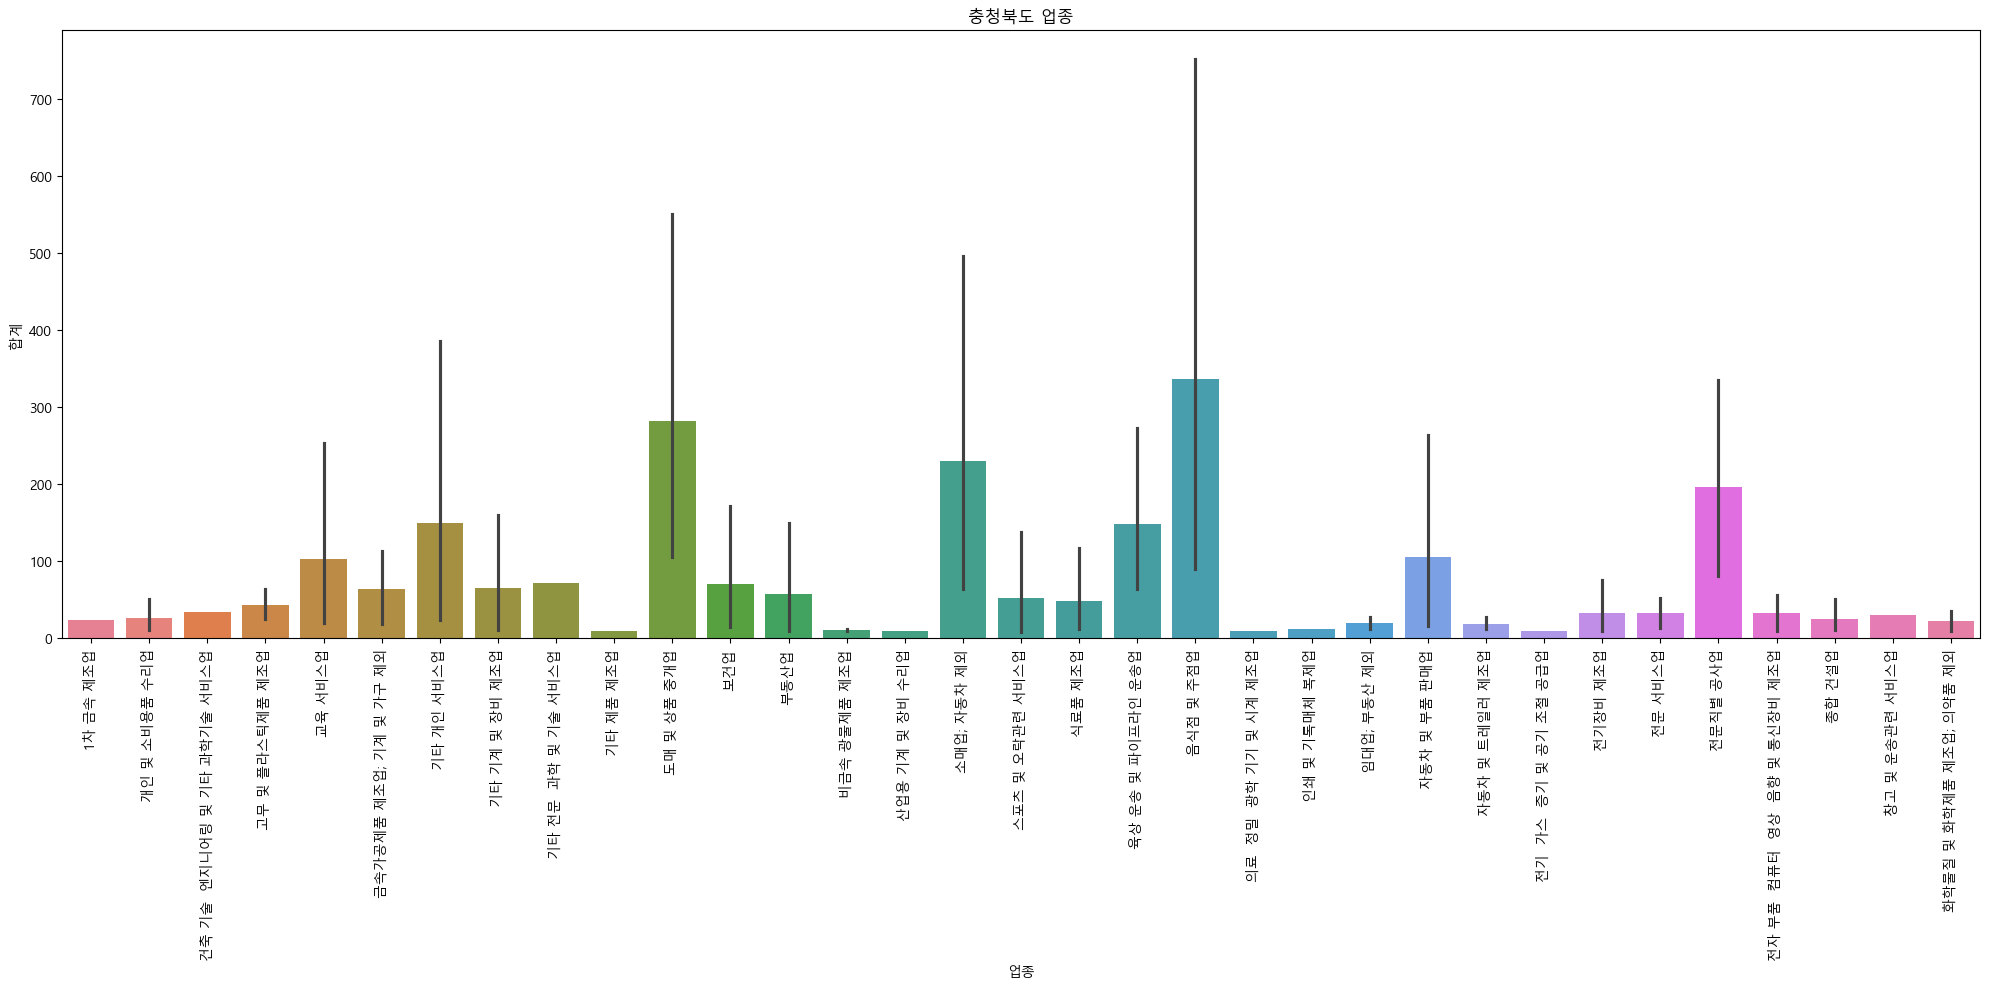

In [23]:
for region in tmp['지역_도'].unique():
    plt.figure(figsize=(20, 10))
    sns.barplot(x='bizBzcCdNm', y='지역', hue='bizBzcCdNm', data=tmp[tmp['지역_도'] == region].sort_values(by='bizBzcCdNm'))
    plt.xticks(rotation=90)
    plt.title(f'{region} 업종')
    plt.xlabel('업종')
    plt.ylabel('합계')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [24]:
tmp = tmp[(tmp['지역_도']=='대구광역시')& (tmp['bizBzcCdNm']=='음식점 및 주점업')]

In [25]:
tmp

,year,bizBzcCd,bizBzcCdNm,지역_도,지역_시,지역
2351,2023,56,음식점 및 주점업,대구광역시,군위군,28
2352,2023,56,음식점 및 주점업,대구광역시,남구,628
2353,2023,56,음식점 및 주점업,대구광역시,달서구,2244
2354,2023,56,음식점 및 주점업,대구광역시,달성군,1140
2355,2023,56,음식점 및 주점업,대구광역시,동구,1364
2356,2023,56,음식점 및 주점업,대구광역시,북구,1740
2357,2023,56,음식점 및 주점업,대구광역시,서구,700
2358,2023,56,음식점 및 주점업,대구광역시,수성구,1624
2359,2023,56,음식점 및 주점업,대구광역시,중구,1008


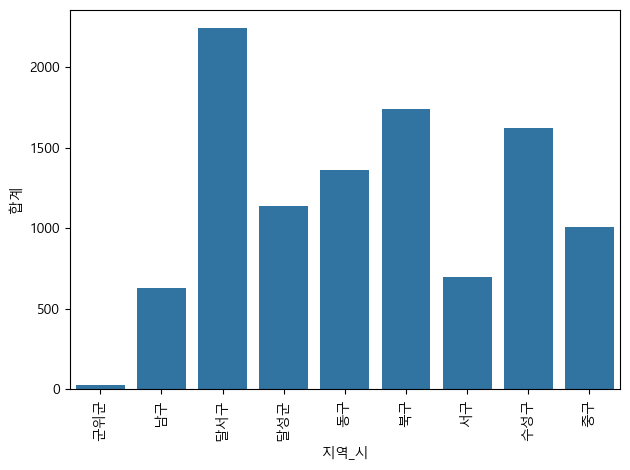

In [26]:
plt.figure()
sns.barplot(x='지역_시', y='지역', data=tmp)
plt.xticks(rotation=90)

plt.ylabel('합계')

plt.tight_layout()
plt.show()

In [ ]:
tmp = tmp.pivot_table(index=['bizBzcCd', 'bizBzcCdNm', '지역_시'], columns='basYm', values='count', aggfunc='sum').reset_index()

In [72]:
tmp.to_csv(f'{path}/dataset/대구연도별사업자.csv', index=False)

In [39]:
# 연도별 창업 업종 확인 가능할듯? -> 유행이 있었나 확인가능 혹은 그냥 창업?
tmp.sort_values(by='지역_시')

basYm,bizBzcCd,bizBzcCdNm,지역_시,202208,202306,202406
85,42,전문직별 공사업,군위군,NaN,20.0,20.0
94,45,자동차 및 부품 판매업,군위군,NaN,24.0,28.0
103,46,도매 및 상품 중개업,군위군,NaN,128.0,104.0
133,56,음식점 및 주점업,군위군,NaN,28.0,32.0
0,10,식료품 제조업,남구,64.0,68.0,24.0
...,...,...,...,...,...,...
75,33,기타 제품 제조업,중구,56.0,48.0,32.0
61,29,기타 기계 및 장비 제조업,중구,28.0,44.0,36.0
193,85,교육 서비스업,중구,72.0,80.0,56.0
162,71,전문 서비스업,중구,76.0,116.0,84.0


In [ ]:
# 2. 라인그래프 (Line Graph)
fig, ax = plt.subplots(figsize=(10, 6))

tmp.fillna(0, inplace=True)
# 각 지역별 수치 변화를 나타내는 선 그래프
for region in df['지역_도'].unique():
    for industry in df['bizBzcCdNm'].unique():
        ax.plot(tmp[(tmp['지역_시'] == region) & (tmp['bizBzcCdNm'] == industry)][[202208, 202306, 202406]].values.flatten(), label=region)

# 그래프에 제목과 라벨 추가
plt.title('지역별 업종 수치 변화', fontsize=16)
plt.xlabel('년도', fontsize=12)
plt.ylabel('수치', fontsize=12)
plt.legend(title='지역', loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
tmp[tmp['bizBzcCd']==56][['지역_시', 202208, 202306, 202406]].groupby('지역_시').sum().reset_index()

basYm,지역_시,202208,202306,202406
0,군위군,0.0,28.0,32.0
1,남구,560.0,628.0,544.0
2,달서구,2172.0,2244.0,2092.0
3,달성군,1172.0,1140.0,1016.0
4,동구,1312.0,1364.0,1268.0
5,북구,1804.0,1740.0,1432.0
6,서구,668.0,700.0,648.0
7,수성구,1484.0,1624.0,1408.0
8,중구,940.0,1008.0,928.0


In [80]:
restaurant=tmp[tmp['bizBzcCd']==56][['지역_시',	202208,	202306,	202406]].groupby('지역_시').sum().reset_index()

In [92]:
restaurant = restaurant.melt(id_vars=['지역_시'], value_vars=[202208, 202306, 202406], var_name='기간', value_name='값')

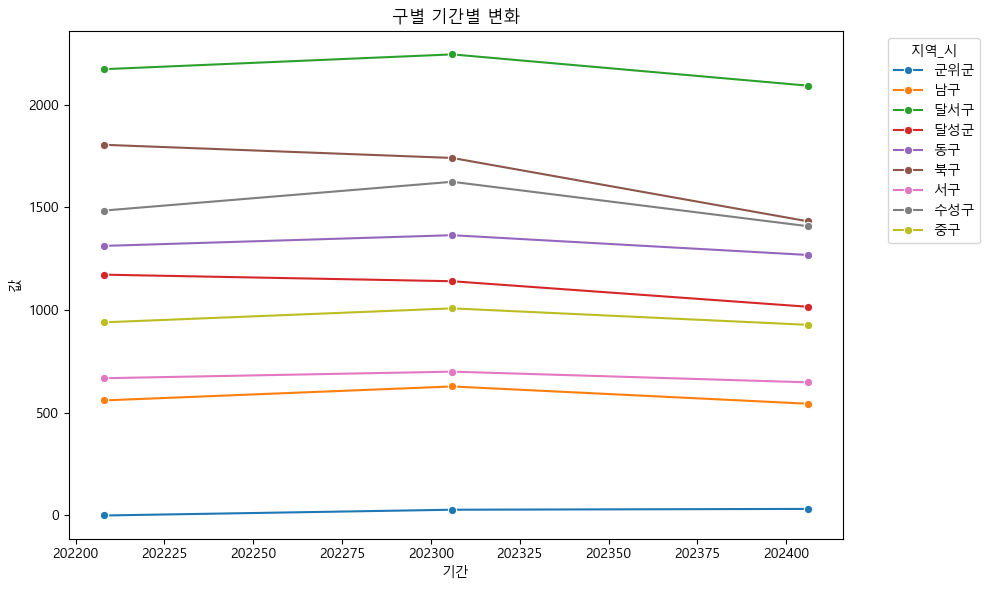

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=restaurant, x='기간', y='값', hue='지역_시', marker='o')

# 제목 및 레이블 설정
plt.title('구별 기간별 변화')
plt.xlabel('기간')
plt.ylabel('값')
plt.legend(title='지역_시', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

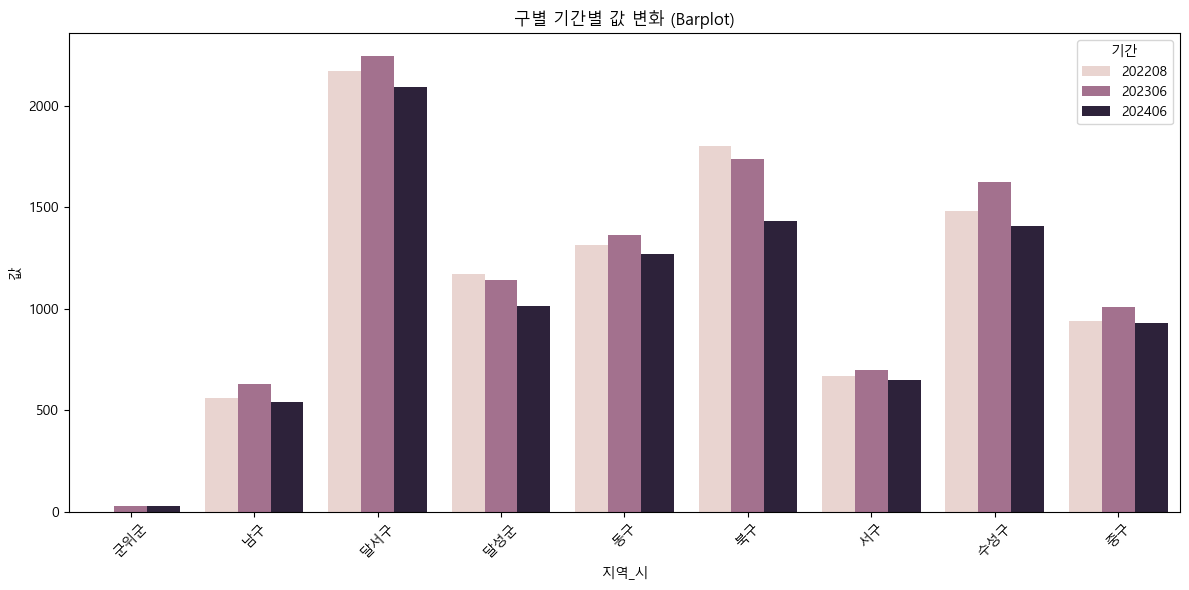

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(data=restaurant, x='지역_시', y='값', hue='기간')

# 제목 및 레이블 설정
plt.title('구별 기간별 값 변화 (Barplot)')
plt.xlabel('지역_시')
plt.ylabel('값')
plt.xticks(rotation=45)  # x축 레이블 회전

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=restaurant, x='지역_시', y='값', hue='기간')

# 제목 및 레이블 설정
plt.title('구별 기간별 값 변화 (Barplot)')
plt.xlabel('지역_시')
plt.ylabel('값')
plt.xticks(rotation=45)  # x축 레이블 회전

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# 업종, 지역별로
# 인구 확인